In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Clone the repository

In [2]:
!git clone https://github.com/acse-jy220/SFC-CAE-Ready-to-use

Cloning into 'SFC-CAE-Ready-to-use'...
remote: Enumerating objects: 1266, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 1266 (delta 212), reused 271 (delta 125), pack-reused 903
Receiving objects: 100% (1266/1266), 2.39 MiB | 742.00 KiB/s, done.
Resolving deltas: 100% (785/785), done.


In [1]:
%cd SFC-CAE-Ready-to-use

/content/SFC-CAE-Ready-to-use


In [2]:
!git pull

remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15 (delta 11), reused 10 (delta 6), pack-reused 0
Unpacking objects: 100% (15/15), done.
From https://github.com/acse-jy220/SFC-CAE-Ready-to-use
   73460c0..054836e  main       -> origin/main
Updating 73460c0..054836e
Fast-forward
 command_train.py      | 14 ++++++++------
 sfc_cae/structured.py |  2 +-
 2 files changed, 9 insertions(+), 7 deletions(-)


### Install dependencies

In [5]:
!pip install -e .

Obtaining file:///content/SFC-CAE-Ready-to-use
     |████████████████████████████████| 59.5 MB 39 kB/s 
     |████████████████████████████████| 163 kB 85.0 MB/s 
     |████████████████████████████████| 223 kB 73.6 MB/s 
     |████████████████████████████████| 1.1 MB 85.9 MB/s 
     |████████████████████████████████| 3.7 MB 76.2 MB/s 
     |████████████████████████████████| 83 kB 3.2 MB/s 
     |████████████████████████████████| 1.8 MB 77.8 MB/s 
     |████████████████████████████████| 495 kB 60.7 MB/s 
     |████████████████████████████████| 3.1 MB 69.8 MB/s 
     |████████████████████████████████| 74 kB 4.9 MB/s 
     |████████████████████████████████| 3.2 MB 48.4 MB/s 
     |████████████████████████████████| 251 kB 73.7 MB/s 
     |████████████████████████████████| 1.3 MB 48.5 MB/s 
     |████████████████████████████████| 294 kB 80.7 MB/s 
     |████████████████████████████████| 142 kB 72.7 MB/s 
     |████████████████████████████████| 357 kB 78.5 MB/s 
  Created wheel for dash: file

### Import the module, very important, don't forget!!!

In [3]:
from sfc_cae import *

## Specify the problem (equation, variables, conditions)
<br>

The PDE equation for two-dimension (2D) advection problem can be written as:
$$\frac{\partial c}{\partial t} = - U\frac{\partial c}{\partial x} - V\frac{\partial c}{\partial y}, $$

where we have the following variables:

$t$: time.<br>
$x$: our $1_\text{st}$ space dimension.<br>
$y$: our $2_\text{nd}$ space dimension.<br>
$c$: concentration of some quantity depend on $t$ and $x$, can be denoted as $c(t, x)$.<br>
<br>

as well as two scalar constants: <br>

$U$: $1_\text{st}$ component of advection velocity <br>
$V$: $2_\text{nd}$ component of advection velocity <br>

## An analytical solution

As for time-stepping, we use a peseudo analytical solution (assuming the concentration block only moves, no diffusion at all):

$$
c(x, y, t) = c_0(x - Ut, y - Vt)
$$
where
$$
c_0(x, y) = c(x, y, 0)
$$

</div>

## Initial condition

$$
c^{0}(x, y) = 
\left\{ 
\begin{aligned} 
1 &, \;\; (x, y) \in [x_0 - \frac{d}{2}, x_0 + \frac{d}{2}] \times [y_0 -  \frac{d}{2}, y_0 +  \frac{d}{2}]\\
0 &, \;\; \text{otherwise}
\end{aligned}\right.
$$

where $d$ is the size of the block.


### Generate simulations

#### initialise model 

In [5]:
# advection block
simulation = run_simulation_advection()
# advection gaussian
# simulation = run_simulation_advection(init_func = sinusoidal_disturbance)

#### Simulation outputs (run 500 simulations)

In [5]:
!mkdir -p ../advection_block_128
%cd ../advection_block_128

/content/advection_block_128


##### The following code takes 20 minutes:

In [6]:
simulation.clear_run_times()
simulation_nums = 500
cnt_progress = 0
bar=progressbar.ProgressBar(maxval=simulation_nums)
for i in range (simulation_nums):
    cnt_progress += 1
    simulation()
    simulation.output_snapshots()
    bar.update(cnt_progress)
bar.finish()

100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 1 starting...
(x0, y0): (2.3015862988661633, 2.2221456589611055)
(U, V): (13.492068505669183, 13.889271705194473)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 2 starting...
(x0, y0): (2.309528544440336, 7.388200948003051)
(U, V): (13.452357277798317, -11.941004740015252)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 3 starting...
(x0, y0): (5.407039005395759, 7.015367720661673)
(U, V): (-2.0351950269787933, -10.076838603308364)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 4 starting...
(x0, y0): (2.17728894836962, 2.478139918911183)
(U, V): (14.1135552581519, 12.609300405444088)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 5 starting...
(x0, y0): (6.11979272012837, 7.856721433276065)
(U, V): (-5.598963600641849, -14.283607166380325)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 6 starting...
(x0, y0): (3.586416460355183, 3.3588387408299085)
(U, V): (7.067917698224084, 8.205806295850458)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 7 starting...
(x0, y0): (5.510953866226665, 2.3106157700452177)
(U, V): (-2.5547693311333264, 13.446921149773914)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 8 starting...
(x0, y0): (7.259287561622672, 3.4473085529661915)
(U, V): (-11.296437808113362, 7.763457235169042)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 9 starting...
(x0, y0): (7.953261979511715, 6.109121538019353)
(U, V): (-14.766309897558573, -5.545607690096763)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 10 starting...
(x0, y0): (6.730442623792173, 6.192771486178967)
(U, V): (-8.652213118960862, -5.963857430894834)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 11 starting...
(x0, y0): (6.410451425027835, 6.3267380326415825)
(U, V): (-7.052257125139176, -6.633690163207913)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 12 starting...
(x0, y0): (7.78502105526027, 2.251591363402879)
(U, V): (-13.925105276301348, 13.742043182985606)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 13 starting...
(x0, y0): (1.868181018696859, 8.642718206655713)
(U, V): (15.659094906515705, -18.213591033278565)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 14 starting...
(x0, y0): (8.54840419190722, 4.885080498681689)
(U, V): (-17.742020959536102, 0.5745975065915543)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 15 starting...
(x0, y0): (8.191402906661743, 8.39886846067199)
(U, V): (-15.957014533308715, -16.994342303359947)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 16 starting...
(x0, y0): (2.6336296996257476, 3.4770718263595253)
(U, V): (11.831851501871261, 7.614640868202374)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 17 starting...
(x0, y0): (6.384683727088808, 3.164192434806621)
(U, V): (-6.923418635444039, 9.179037825966896)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 18 starting...
(x0, y0): (4.248543021397447, 1.4736096434550872)
(U, V): (3.7572848930127645, 17.63195178272456)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 19 starting...
(x0, y0): (4.458908808108124, 7.436351272637747)
(U, V): (2.705455959459382, -12.181756363188736)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 20 starting...
(x0, y0): (5.9184482719336415, 4.3534739391823525)
(U, V): (-4.592241359668208, 3.2326303040882376)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 21 starting...
(x0, y0): (5.6661946815373705, 5.2777883063412805)
(U, V): (-3.3309734076868525, -1.3889415317064024)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 22 starting...
(x0, y0): (6.435701341510836, 4.7078571626956816)
(U, V): (-7.178506707554182, 1.4607141865215922)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 23 starting...
(x0, y0): (2.7912580233660726, 1.8548228856907854)
(U, V): (11.043709883169637, 15.725885571546074)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 24 starting...
(x0, y0): (7.898785504128506, 3.7496684696316955)
(U, V): (-14.493927520642531, 6.251657651841523)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 25 starting...
(x0, y0): (4.7317684189396, 1.3538057716649232)
(U, V): (1.3411579053019995, 18.230971141675383)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 26 starting...
(x0, y0): (2.9342012381636, 7.605773478856283)
(U, V): (10.328993809182, -13.028867394281413)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 27 starting...
(x0, y0): (7.5367705126683875, 4.69553686977794)
(U, V): (-12.683852563341937, 1.5223156511102998)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 28 starting...
(x0, y0): (6.898253608039529, 3.01152300726141)
(U, V): (-9.491268040197646, 9.94238496369295)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 29 starting...
(x0, y0): (3.4805283542103496, 1.674536166199143)
(U, V): (7.597358228948252, 16.627319169004284)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 30 starting...
(x0, y0): (3.1460331630054204, 3.9817360816704057)
(U, V): (9.269834184972899, 5.091319591647972)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 31 starting...
(x0, y0): (1.3048814779319107, 6.913105047703244)
(U, V): (18.475592610340446, -9.56552523851622)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 32 starting...
(x0, y0): (2.2096594010658293, 4.679492765521242)
(U, V): (13.951702994670852, 1.6025361723937914)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 33 starting...
(x0, y0): (7.818030404726665, 6.312651975154946)
(U, V): (-14.090152023633324, -6.56325987577473)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 34 starting...
(x0, y0): (2.7230253103515056, 4.89910309137926)
(U, V): (11.38487344824247, 0.5044845431037004)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 35 starting...
(x0, y0): (7.984749006409237, 4.906625096034955)
(U, V): (-14.923745032046183, 0.46687451982522443)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 36 starting...
(x0, y0): (6.619068905880913, 5.288718407206944)
(U, V): (-8.095344529404564, -1.4435920360347199)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 37 starting...
(x0, y0): (8.634476357471808, 1.5103127966303602)
(U, V): (-18.17238178735904, 17.448436016848195)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 38 starting...
(x0, y0): (4.435923602675756, 2.2530543677869486)
(U, V): (2.8203819866212188, 13.73472816106526)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 39 starting...
(x0, y0): (6.1904389390587164, 6.778356311860618)
(U, V): (-5.952194695293582, -8.891781559303089)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 40 starting...
(x0, y0): (6.6486782935660935, 5.08990224537412)
(U, V): (-8.243391467830467, -0.4495112268705981)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 41 starting...
(x0, y0): (4.164101694259561, 8.171683375132218)
(U, V): (4.179491528702197, -15.858416875661092)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 42 starting...
(x0, y0): (8.379035271888842, 2.8430941039827973)
(U, V): (-16.89517635944421, 10.784529480086013)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 43 starting...
(x0, y0): (8.305168701717356, 1.5663844108099731)
(U, V): (-16.52584350858678, 17.16807794595013)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 44 starting...
(x0, y0): (5.246263763450611, 3.9337195186106375)
(U, V): (-1.2313188172530554, 5.331402406946813)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 45 starting...
(x0, y0): (4.460914991096205, 3.443952265586477)
(U, V): (2.6954250445189754, 7.780238672067615)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 46 starting...
(x0, y0): (6.997537089807803, 5.024398875461959)
(U, V): (-9.987685449039017, -0.12199437730979312)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 47 starting...
(x0, y0): (6.966244699666216, 1.492403302030808)
(U, V): (-9.831223498331081, 17.537983489845956)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 48 starting...
(x0, y0): (5.698262513361192, 2.3709365873199912)
(U, V): (-3.491312566805962, 13.145317063400043)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 49 starting...
(x0, y0): (7.142492012052206, 5.372986455097787)
(U, V): (-10.71246006026103, -1.8649322754889353)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 50 starting...
(x0, y0): (8.257009369294003, 6.403273029967631)
(U, V): (-16.285046846470017, -7.016365149838153)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 51 starting...
(x0, y0): (7.759349941312629, 7.648233168891762)
(U, V): (-13.796749706563144, -13.241165844458811)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 52 starting...
(x0, y0): (1.8649947015928974, 4.334422854318499)
(U, V): (15.675026492035515, 3.327885728407507)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 53 starting...
(x0, y0): (2.1834949547302926, 3.3135184447911503)
(U, V): (14.082525226348537, 8.432407776044249)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 54 starting...
(x0, y0): (3.610878268923331, 7.248234292868878)
(U, V): (6.945608655383344, -11.241171464344388)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 55 starting...
(x0, y0): (1.6371581821511116, 6.908478599752229)
(U, V): (16.814209089244443, -9.542392998761144)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 56 starting...
(x0, y0): (2.850225587779706, 8.17833585603562)
(U, V): (10.748872061101471, -15.8916792801781)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 57 starting...
(x0, y0): (1.4823100256795314, 2.2546334998980395)
(U, V): (17.588449871602343, 13.726832500509802)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 58 starting...
(x0, y0): (4.077676752678665, 1.3686364869625114)
(U, V): (4.611616236606677, 18.156817565187442)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 59 starting...
(x0, y0): (2.550098719887529, 7.6980343264815305)
(U, V): (12.249506400562353, -13.490171632407652)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 60 starting...
(x0, y0): (6.577823237798623, 3.441221530721753)
(U, V): (-7.889116188993115, 7.793892346391234)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 61 starting...
(x0, y0): (5.007863223215924, 7.403996805519122)
(U, V): (-0.03931611607962182, -12.019984027595608)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 62 starting...
(x0, y0): (4.044844335107479, 6.513137416270497)
(U, V): (4.775778324462605, -7.5656870813524835)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 63 starting...
(x0, y0): (4.74916869593174, 4.100340743038263)
(U, V): (1.2541565203413008, 4.498296284808685)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 64 starting...
(x0, y0): (3.738706780261291, 4.568312717941619)
(U, V): (6.306466098693544, 2.1584364102919062)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 65 starting...
(x0, y0): (3.896430439524189, 1.3079746655868296)
(U, V): (5.5178478023790545, 18.46012667206585)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 66 starting...
(x0, y0): (5.460208065273687, 8.136910581351643)
(U, V): (-2.301040326368433, -15.684552906758213)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 67 starting...
(x0, y0): (6.767035908478171, 3.121063148402899)
(U, V): (-8.835179542390854, 9.394684257985507)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 68 starting...
(x0, y0): (8.736239105463358, 1.5905042386815431)
(U, V): (-18.681195527316792, 17.047478806592284)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 69 starting...
(x0, y0): (8.388975335116077, 6.963054284491427)
(U, V): (-16.944876675580385, -9.815271422457137)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 70 starting...
(x0, y0): (1.7426774493487815, 8.57770673917781)
(U, V): (16.286612753256094, -17.88853369588905)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 71 starting...
(x0, y0): (5.97311483327509, 3.930524857257183)
(U, V): (-4.865574166375448, 5.347375713714085)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 72 starting...
(x0, y0): (1.6077282197757756, 5.486677578156575)
(U, V): (16.96135890112112, -2.4333878907828765)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 73 starting...
(x0, y0): (2.9188294459495725, 3.3276361307421083)
(U, V): (10.405852770252135, 8.361819346289456)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 74 starting...
(x0, y0): (2.399261006550617, 5.724032615782107)
(U, V): (13.003694967246915, -3.6201630789105366)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 75 starting...
(x0, y0): (1.841531444597719, 5.810125859895911)
(U, V): (15.792342777011408, -4.050629299479556)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 76 starting...
(x0, y0): (3.2195322626560685, 2.50193912659092)
(U, V): (8.902338686719657, 12.490304367045399)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 77 starting...
(x0, y0): (5.238230335139326, 6.586306458822226)
(U, V): (-1.191151675696629, -7.93153229411113)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 78 starting...
(x0, y0): (6.353819888405334, 8.092597733835138)
(U, V): (-6.769099442026669, -15.46298866917569)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 79 starting...
(x0, y0): (2.1500186417079217, 3.4297920425491335)
(U, V): (14.249906791460392, 7.851039787254333)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 80 starting...
(x0, y0): (7.779917228009757, 8.689975804769366)
(U, V): (-13.899586140048784, -18.44987902384683)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 81 starting...
(x0, y0): (5.612012843932213, 7.619616093218017)
(U, V): (-3.060064219661065, -13.098080466090085)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 82 starting...
(x0, y0): (6.586747282443403, 6.13253476884721)
(U, V): (-7.933736412217014, -5.662673844236048)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 83 starting...
(x0, y0): (1.9251564431921198, 5.891931908746079)
(U, V): (15.374217784039402, -4.459659543730394)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 84 starting...
(x0, y0): (2.89600799777077, 6.431336327490866)
(U, V): (10.51996001114615, -7.156681637454332)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 85 starting...
(x0, y0): (3.8957530275223586, 1.3788687918379638)
(U, V): (5.521234862388207, 18.10565604081018)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 86 starting...
(x0, y0): (6.277192011062821, 8.54669368507113)
(U, V): (-6.385960055314106, -17.73346842535565)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 87 starting...
(x0, y0): (2.9540931940583404, 8.251779060669634)
(U, V): (10.229534029708297, -16.25889530334817)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 88 starting...
(x0, y0): (4.773505645957888, 5.3801444203560465)
(U, V): (1.1324717702105591, -1.9007221017802323)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 89 starting...
(x0, y0): (5.793549677565002, 2.1472327732179863)
(U, V): (-3.9677483878250097, 14.263836133910068)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 90 starting...
(x0, y0): (1.3126701755381442, 2.5157885215871225)
(U, V): (18.436649122309277, 12.421057392064387)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 91 starting...
(x0, y0): (4.510356666117588, 6.290995410455347)
(U, V): (2.448216669412062, -6.454977052276734)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 92 starting...
(x0, y0): (4.705807574137237, 7.033392320078511)
(U, V): (1.470962129313813, -10.166961600392556)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 93 starting...
(x0, y0): (2.0216953488651193, 5.439447690991506)
(U, V): (14.891523255674404, -2.197238454957531)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 94 starting...
(x0, y0): (6.851364859038004, 4.169410695023133)
(U, V): (-9.256824295190018, 4.152946524884333)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 95 starting...
(x0, y0): (8.029007610314213, 7.1654589726114715)
(U, V): (-15.145038051571067, -10.827294863057357)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 96 starting...
(x0, y0): (3.9115951326706444, 5.68077841320709)
(U, V): (5.442024336646778, -3.40389206603545)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 97 starting...
(x0, y0): (6.850822886252006, 1.5521767278257212)
(U, V): (-9.25411443126003, 17.239116360871396)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 98 starting...
(x0, y0): (7.289986931495034, 2.0273174384201385)
(U, V): (-11.449934657475168, 14.863412807899307)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 99 starting...
(x0, y0): (7.459643041641178, 1.9472559746730687)
(U, V): (-12.29821520820589, 15.263720126634654)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 100 starting...
(x0, y0): (3.8660128379254917, 7.5041902371134)
(U, V): (5.66993581037254, -12.520951185567002)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 101 starting...
(x0, y0): (3.0492103042796277, 3.7990047985651985)
(U, V): (9.753948478601862, 6.004976007174008)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 102 starting...
(x0, y0): (3.7908345965103645, 4.258683378980778)
(U, V): (6.045827017448176, 3.7065831050961107)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 103 starting...
(x0, y0): (2.775602500071936, 3.453219332619459)
(U, V): (11.12198749964032, 7.7339033369027055)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 104 starting...
(x0, y0): (8.55682104072888, 5.99170557392241)
(U, V): (-17.784105203644394, -4.958527869612048)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 105 starting...
(x0, y0): (7.428053058570493, 3.6949041248482777)
(U, V): (-12.140265292852463, 6.525479375758612)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 106 starting...
(x0, y0): (5.164797938555842, 4.613737857201268)
(U, V): (-0.8239896927792101, 1.9313107139936614)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 107 starting...
(x0, y0): (6.765517054146357, 6.57697346284376)
(U, V): (-8.827585270731783, -7.884867314218802)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 108 starting...
(x0, y0): (3.802523867024511, 7.643935759992178)
(U, V): (5.987380664877443, -13.219678799960887)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 109 starting...
(x0, y0): (8.057884866812099, 7.374800560479536)
(U, V): (-15.289424334060495, -11.87400280239768)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 110 starting...
(x0, y0): (6.486869927120838, 3.592243011844277)
(U, V): (-7.434349635604192, 7.038784940778616)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 111 starting...
(x0, y0): (6.6812707787483046, 7.706070729178284)
(U, V): (-8.406353893741523, -13.530353645891422)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 112 starting...
(x0, y0): (6.505074015546802, 3.0885195512077517)
(U, V): (-7.525370077734008, 9.557402243961242)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 113 starting...
(x0, y0): (4.529997900204867, 5.628648696830322)
(U, V): (2.3500104989756654, -3.143243484151612)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 114 starting...
(x0, y0): (6.632557409271421, 8.706052785512643)
(U, V): (-8.162787046357103, -18.530263927563215)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 115 starting...
(x0, y0): (4.105042498926013, 8.264245721466358)
(U, V): (4.474787505369937, -16.321228607331786)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 116 starting...
(x0, y0): (2.404030140366175, 5.619453215838069)
(U, V): (12.979849298169128, -3.097266079190346)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 117 starting...
(x0, y0): (3.7531883274092963, 3.9345093641419417)
(U, V): (6.234058362953519, 5.327453179290291)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 118 starting...
(x0, y0): (6.704309034621415, 4.288359897167924)
(U, V): (-8.521545173107077, 3.558200514160381)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 119 starting...
(x0, y0): (3.6311710023875485, 4.0020249837160575)
(U, V): (6.844144988062258, 4.989875081419712)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 120 starting...
(x0, y0): (4.730850939297616, 2.3049255530223345)
(U, V): (1.3457453035119205, 13.475372234888328)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 121 starting...
(x0, y0): (8.74652700469738, 6.273449117167688)
(U, V): (-18.732635023486903, -6.367245585838441)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 122 starting...
(x0, y0): (5.992973418408365, 2.7261959707661845)
(U, V): (-4.964867092041825, 11.369020146169078)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 123 starting...
(x0, y0): (5.56503268815489, 2.1038106407215094)
(U, V): (-2.8251634407744497, 14.480946796392455)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 124 starting...
(x0, y0): (7.307077696264428, 1.850750660198453)
(U, V): (-11.535388481322139, 15.746246699007733)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 125 starting...
(x0, y0): (4.327727930696049, 7.389426016534094)
(U, V): (3.361360346519753, -11.947130082670471)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 126 starting...
(x0, y0): (5.687166296696102, 6.812520523809446)
(U, V): (-3.4358314834805093, -9.062602619047228)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 127 starting...
(x0, y0): (3.3470614338864393, 7.020509726230396)
(U, V): (8.264692830567801, -10.102548631151981)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 128 starting...
(x0, y0): (7.167511562647026, 7.3053734215249815)
(U, V): (-10.83755781323513, -11.526867107624907)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 129 starting...
(x0, y0): (6.89510077662184, 5.158272953275139)
(U, V): (-9.4755038831092, -0.7913647663756951)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 130 starting...
(x0, y0): (3.7488391807330212, 4.391740562420024)
(U, V): (6.255804096334892, 3.0412971878998807)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 131 starting...
(x0, y0): (7.366182879023588, 1.4411617648322292)
(U, V): (-11.830914395117942, 17.794191175838854)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 132 starting...
(x0, y0): (5.798691713332005, 1.9585752884078351)
(U, V): (-3.993458566660024, 15.207123557960822)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 133 starting...
(x0, y0): (3.171178562223572, 3.51076937671047)
(U, V): (9.14410718888214, 7.446153116447648)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 134 starting...
(x0, y0): (8.616878351692668, 1.654701813091014)
(U, V): (-18.084391758463337, 16.726490934544927)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 135 starting...
(x0, y0): (1.4064392399651875, 5.5049389328859455)
(U, V): (17.96780380017406, -2.5246946644297275)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 136 starting...
(x0, y0): (4.939641908509101, 6.514907911038945)
(U, V): (0.30179045745449606, -7.574539555194724)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 137 starting...
(x0, y0): (7.843432023001166, 6.898107904295296)
(U, V): (-14.21716011500583, -9.49053952147648)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 138 starting...
(x0, y0): (7.239598098718749, 6.3786974538623875)
(U, V): (-11.197990493593743, -6.893487269311938)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 139 starting...
(x0, y0): (3.6643926254795938, 7.600221991040742)
(U, V): (6.678036872602031, -13.001109955203711)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 140 starting...
(x0, y0): (5.371103106771763, 8.188556616343163)
(U, V): (-1.8555155338588136, -15.942783081715817)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 141 starting...
(x0, y0): (8.408249398050291, 8.521177073037926)
(U, V): (-17.041246990251455, -17.60588536518963)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 142 starting...
(x0, y0): (8.272293750126757, 1.7903093869498132)
(U, V): (-16.361468750633783, 16.048453065250932)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 143 starting...
(x0, y0): (5.271410217671981, 4.862125989180164)
(U, V): (-1.3570510883599063, 0.6893700540991787)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 144 starting...
(x0, y0): (5.657293364859798, 2.802012551774898)
(U, V): (-3.286466824298988, 10.989937241125508)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 145 starting...
(x0, y0): (7.2303262244756805, 6.598154643991597)
(U, V): (-11.151631122378403, -7.990773219957985)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 146 starting...
(x0, y0): (6.822594076794127, 1.554904868826795)
(U, V): (-9.112970383970636, 17.22547565586602)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 147 starting...
(x0, y0): (2.9719683500814917, 4.253640703964017)
(U, V): (10.140158249592544, 3.7317964801799164)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 148 starting...
(x0, y0): (4.024709603744757, 3.4693218220866076)
(U, V): (4.876451981276215, 7.653390889566962)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 149 starting...
(x0, y0): (8.163387247911256, 8.308017042357587)
(U, V): (-15.81693623955628, -16.540085211787936)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 150 starting...
(x0, y0): (1.6745661899467035, 3.433863130580818)
(U, V): (16.62716905026648, 7.830684347095911)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 151 starting...
(x0, y0): (4.596357640806335, 4.698965869154206)
(U, V): (2.0182117959683232, 1.5051706542289711)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 152 starting...
(x0, y0): (5.893774866024423, 4.755808228660516)
(U, V): (-4.468874330122117, 1.2209588566974183)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 153 starting...
(x0, y0): (6.957618421899928, 7.441533647309533)
(U, V): (-9.788092109499642, -12.207668236547663)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 154 starting...
(x0, y0): (2.992511366825803, 4.046093310385716)
(U, V): (10.037443165870984, 4.769533448071419)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 155 starting...
(x0, y0): (7.146630050479966, 5.965830553252796)
(U, V): (-10.73315025239983, -4.82915276626398)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 156 starting...
(x0, y0): (1.459668763218012, 8.237342227851913)
(U, V): (17.70165618390994, -16.186711139259565)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 157 starting...
(x0, y0): (7.287279630498789, 6.342849885856496)
(U, V): (-11.436398152493945, -6.7142494292824795)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 158 starting...
(x0, y0): (7.8383506978066695, 6.41226615679113)
(U, V): (-14.191753489033347, -7.0613307839556505)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 159 starting...
(x0, y0): (6.298270785263268, 2.6876713449925553)
(U, V): (-6.491353926316341, 11.561643275037223)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 160 starting...
(x0, y0): (4.224403582773993, 1.312251181793567)
(U, V): (3.877982086130034, 18.438744091032166)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 161 starting...
(x0, y0): (2.105422658653889, 4.058700135894593)
(U, V): (14.472886706730552, 4.706499320527033)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 162 starting...
(x0, y0): (7.454188516125677, 2.2134426052943725)
(U, V): (-12.270942580628383, 13.932786973528136)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 163 starting...
(x0, y0): (5.876870579679478, 8.013719448013427)
(U, V): (-4.38435289839739, -15.068597240067136)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 164 starting...
(x0, y0): (7.714716714033342, 2.7729059115464088)
(U, V): (-13.57358357016671, 11.135470442267955)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 165 starting...
(x0, y0): (2.9972436377076903, 5.143391262613676)
(U, V): (10.013781811461548, -0.7169563130683798)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 166 starting...
(x0, y0): (6.713893569291445, 7.126642049244143)
(U, V): (-8.569467846457224, -10.633210246220717)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 167 starting...
(x0, y0): (2.157584166798147, 5.266987075219259)
(U, V): (14.212079166009266, -1.3349353760962934)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 168 starting...
(x0, y0): (4.097120074312004, 2.787571828620273)
(U, V): (4.51439962843998, 11.062140856898637)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 169 starting...
(x0, y0): (7.250311025752969, 7.39654889063751)
(U, V): (-11.251555128764842, -11.982744453187548)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 170 starting...
(x0, y0): (2.074566285924534, 3.9161334488502657)
(U, V): (14.627168570377327, 5.4193327557486715)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 171 starting...
(x0, y0): (2.78145931778, 7.530829945144956)
(U, V): (11.092703411100002, -12.654149725724778)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 172 starting...
(x0, y0): (5.663918472027886, 7.360332550928873)
(U, V): (-3.3195923601394295, -11.801662754644363)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 173 starting...
(x0, y0): (8.647314042218872, 3.070382726486174)
(U, V): (-18.236570211094357, 9.64808636756913)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 174 starting...
(x0, y0): (5.004614408541576, 2.2511568608389574)
(U, V): (-0.023072042707878992, 13.744215695805213)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 175 starting...
(x0, y0): (4.776296719662189, 6.72511472273924)
(U, V): (1.1185164016890559, -8.625573613696197)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 176 starting...
(x0, y0): (5.7779576690314265, 6.34272329603439)
(U, V): (-3.8897883451571325, -6.713616480171951)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 177 starting...
(x0, y0): (4.188867798938407, 8.188360533369693)
(U, V): (4.0556610053079645, -15.941802666848464)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 178 starting...
(x0, y0): (7.780983435929187, 3.898346409338424)
(U, V): (-13.904917179645935, 5.508267953307878)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 179 starting...
(x0, y0): (8.204420056031104, 3.82149812191675)
(U, V): (-16.02210028015552, 5.892509390416248)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 180 starting...
(x0, y0): (2.464381203127415, 8.061859181537033)
(U, V): (12.678093984362926, -15.309295907685163)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 181 starting...
(x0, y0): (3.2869099392888916, 7.123707163688466)
(U, V): (8.565450303555542, -10.618535818442329)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 182 starting...
(x0, y0): (4.835297225628516, 6.884136275126411)
(U, V): (0.823513871857422, -9.420681375632055)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 183 starting...
(x0, y0): (3.9353861698507684, 5.9626233916449465)
(U, V): (5.323069150746158, -4.813116958224732)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 184 starting...
(x0, y0): (5.078013379867843, 7.122671600071702)
(U, V): (-0.39006689933921646, -10.61335800035851)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 185 starting...
(x0, y0): (2.89642216518537, 3.2838985726249796)
(U, V): (10.517889174073147, 8.580507136875102)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 186 starting...
(x0, y0): (6.262008598142865, 2.8659398375669616)
(U, V): (-6.310042990714324, 10.670300812165191)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 187 starting...
(x0, y0): (5.421193668683856, 3.0274253886590703)
(U, V): (-2.105968343419282, 9.862873056704649)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 188 starting...
(x0, y0): (8.105694032493982, 5.796890590008833)
(U, V): (-15.528470162469912, -3.984452950044166)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 189 starting...
(x0, y0): (8.360457007174926, 5.93602701900982)
(U, V): (-16.80228503587463, -4.680135095049098)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 190 starting...
(x0, y0): (1.434746347379905, 7.8879466504377005)
(U, V): (17.826268263100474, -14.439733252188502)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 191 starting...
(x0, y0): (3.8279036626014125, 7.741233257447646)
(U, V): (5.860481686992936, -13.706166287238227)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 192 starting...
(x0, y0): (2.9504452645412593, 2.2467810343424186)
(U, V): (10.247773677293702, 13.766094828287905)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 193 starting...
(x0, y0): (3.4095114334646754, 6.956244291695697)
(U, V): (7.952442832676621, -9.781221458478484)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 194 starting...
(x0, y0): (3.1750241626993634, 7.782029462784717)
(U, V): (9.12487918650318, -13.910147313923584)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 195 starting...
(x0, y0): (2.174611897019628, 2.9762750949990195)
(U, V): (14.12694051490186, 10.118624525004902)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 196 starting...
(x0, y0): (6.185953604544077, 1.5214166689098743)
(U, V): (-5.929768022720383, 17.39291665545063)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 197 starting...
(x0, y0): (4.449391149731811, 5.800765626311581)
(U, V): (2.7530442513409437, -4.003828131557907)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 198 starting...
(x0, y0): (3.4311667029982744, 7.213014247775404)
(U, V): (7.844166485008628, -11.06507123887702)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 199 starting...
(x0, y0): (5.840435120196642, 1.3024190603698478)
(U, V): (-4.202175600983211, 18.487904698150757)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 200 starting...
(x0, y0): (4.404076069443711, 4.127126957175632)
(U, V): (2.9796196527814445, 4.364365214121841)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 201 starting...
(x0, y0): (2.819822976091925, 1.8014353283721563)
(U, V): (10.900885119540375, 15.992823358139221)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 202 starting...
(x0, y0): (8.271729048895764, 4.469582368826593)
(U, V): (-16.358645244478822, 2.652088155867034)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 203 starting...
(x0, y0): (7.019390299323455, 6.385799499627604)
(U, V): (-10.096951496617276, -6.928997498138019)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 204 starting...
(x0, y0): (7.46674374895504, 3.7527734746631642)
(U, V): (-12.3337187447752, 6.236132626684179)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 205 starting...
(x0, y0): (6.94639068200185, 3.726555581407705)
(U, V): (-9.731953410009249, 6.367222092961474)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 206 starting...
(x0, y0): (8.090077775897946, 6.291846313654731)
(U, V): (-15.45038887948973, -6.459231568273656)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 207 starting...
(x0, y0): (2.473238309781644, 7.068867619227199)
(U, V): (12.63380845109178, -10.344338096135996)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 208 starting...
(x0, y0): (6.5715174099325955, 7.682038393335756)
(U, V): (-7.857587049662977, -13.41019196667878)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 209 starting...
(x0, y0): (4.348108981016339, 6.57364965158612)
(U, V): (3.2594550949183043, -7.868248257930599)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 210 starting...
(x0, y0): (2.6400031798741184, 5.759046463598123)
(U, V): (11.799984100629407, -3.7952323179906156)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 211 starting...
(x0, y0): (4.132176984624696, 3.251591743154099)
(U, V): (4.339115076876521, 8.742041284229503)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 212 starting...
(x0, y0): (7.334862892255187, 7.693688176323054)
(U, V): (-11.674314461275936, -13.468440881615269)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 213 starting...
(x0, y0): (3.0430339480210327, 8.053181068223376)
(U, V): (9.784830259894836, -15.265905341116879)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 214 starting...
(x0, y0): (7.728582434847105, 7.9013181482851875)
(U, V): (-13.642912174235526, -14.506590741425937)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 215 starting...
(x0, y0): (8.588766859444343, 8.333944235859628)
(U, V): (-17.943834297221713, -16.669721179298136)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 216 starting...
(x0, y0): (2.1319483040918463, 1.252404349078791)
(U, V): (14.340258479540768, 18.737978254606045)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 217 starting...
(x0, y0): (2.053422765230345, 3.761318519422678)
(U, V): (14.732886173848273, 6.193407402886609)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 218 starting...
(x0, y0): (6.830769236569492, 5.911530323805279)
(U, V): (-9.15384618284746, -4.557651619026397)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 219 starting...
(x0, y0): (3.3756837214875617, 5.967101874896735)
(U, V): (8.121581392562192, -4.835509374483675)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 220 starting...
(x0, y0): (6.889323968952295, 5.165499223066596)
(U, V): (-9.446619844761477, -0.8274961153329796)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 221 starting...
(x0, y0): (7.866078804725958, 6.97257555659318)
(U, V): (-14.330394023629788, -9.862877782965901)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 222 starting...
(x0, y0): (8.003040142846782, 6.847482905822215)
(U, V): (-15.01520071423391, -9.237414529111074)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 223 starting...
(x0, y0): (1.5504655146299082, 6.369909640357707)
(U, V): (17.24767242685046, -6.849548201788536)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 224 starting...
(x0, y0): (2.2482546533025007, 5.5347943290104356)
(U, V): (13.758726733487494, -2.6739716450521778)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 225 starting...
(x0, y0): (4.6916583420895694, 8.619950095803176)
(U, V): (1.5417082895521528, -18.09975047901588)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 226 starting...
(x0, y0): (3.110916481537207, 4.93717204083788)
(U, V): (9.445417592313964, 0.3141397958105996)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 227 starting...
(x0, y0): (2.4911915369661877, 5.7061483385429765)
(U, V): (12.544042315169062, -3.5307416927148827)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 228 starting...
(x0, y0): (5.705905135460121, 6.018372976541695)
(U, V): (-3.5295256773006045, -5.0918648827084745)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 229 starting...
(x0, y0): (5.0267738963725055, 6.981245701394389)
(U, V): (-0.13386948186252745, -9.906228506971946)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 230 starting...
(x0, y0): (5.019102554212444, 1.4267784238576047)
(U, V): (-0.09551277106222056, 17.866107880711972)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 231 starting...
(x0, y0): (6.347631845312291, 6.6640912469977405)
(U, V): (-6.738159226561455, -8.320456234988702)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 232 starting...
(x0, y0): (2.229874155252652, 4.152593605458499)
(U, V): (13.850629223736739, 4.237031972707506)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 233 starting...
(x0, y0): (4.386070942106876, 5.435493268964876)
(U, V): (3.069645289465619, -2.1774663448243814)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 234 starting...
(x0, y0): (3.873148275711503, 4.359881516639874)
(U, V): (5.634258621442485, 3.2005924168006317)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 235 starting...
(x0, y0): (5.568587765165503, 5.980119088005072)
(U, V): (-2.842938825827517, -4.900595440025359)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 236 starting...
(x0, y0): (4.063175771096364, 2.9781631670828705)
(U, V): (4.684121144518181, 10.109184164585647)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 237 starting...
(x0, y0): (2.4438847549831073, 7.176336409946861)
(U, V): (12.780576225084461, -10.881682049734307)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 238 starting...
(x0, y0): (7.1717207257702285, 3.7238055458434913)
(U, V): (-10.858603628851142, 6.380972270782542)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 239 starting...
(x0, y0): (6.667406546526543, 4.058053857953556)
(U, V): (-8.337032732632714, 4.709730710232218)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 240 starting...
(x0, y0): (5.206720542926106, 2.9839798361384986)
(U, V): (-1.0336027146305282, 10.080100819307507)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 241 starting...
(x0, y0): (2.7743159130267485, 5.828526656857476)
(U, V): (11.128420434866255, -4.14263328428738)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 242 starting...
(x0, y0): (6.69606356174458, 6.764582695681369)
(U, V): (-8.480317808722901, -8.822913478406846)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 243 starting...
(x0, y0): (8.07245369731691, 7.505356187915898)
(U, V): (-15.362268486584547, -12.526780939579488)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 244 starting...
(x0, y0): (3.3729203232996916, 2.3400901815901096)
(U, V): (8.135398383501542, 13.29954909204945)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 245 starting...
(x0, y0): (5.821604241686422, 7.413858513702068)
(U, V): (-4.108021208432109, -12.069292568510338)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 246 starting...
(x0, y0): (3.913098556002536, 4.545581115349851)
(U, V): (5.434507219987319, 2.2720944232507456)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 247 starting...
(x0, y0): (5.685014906635051, 7.899659621692324)
(U, V): (-3.4250745331752563, -14.49829810846162)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 248 starting...
(x0, y0): (8.688708980635662, 7.705107540927676)
(U, V): (-18.443544903178307, -13.52553770463838)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 249 starting...
(x0, y0): (7.622388499116106, 3.4426337930770217)
(U, V): (-13.111942495580529, 7.786831034614892)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 250 starting...
(x0, y0): (6.8608717563227595, 5.053239408159033)
(U, V): (-9.304358781613796, -0.2661970407951664)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 251 starting...
(x0, y0): (7.0402885111885665, 2.6271797950605404)
(U, V): (-10.201442555942831, 11.8641010246973)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 252 starting...
(x0, y0): (5.55983583334071, 7.6893247251894925)
(U, V): (-2.7991791667035493, -13.446623625947462)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 253 starting...
(x0, y0): (7.120094638697737, 7.949298959455654)
(U, V): (-10.600473193488686, -14.74649479727827)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 254 starting...
(x0, y0): (2.867613553831361, 5.5371660216438805)
(U, V): (10.661932230843192, -2.6858301082194025)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 255 starting...
(x0, y0): (4.564542638687531, 6.255746174187441)
(U, V): (2.1772868065623463, -6.278730870937204)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 256 starting...
(x0, y0): (1.8347277993371067, 2.8754092286160797)
(U, V): (15.826361003314467, 10.6229538569196)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 257 starting...
(x0, y0): (8.285589498093152, 2.5852142233398276)
(U, V): (-16.427947490465762, 12.073928883300864)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 258 starting...
(x0, y0): (7.058616674651922, 3.34840610991572)
(U, V): (-10.293083373259607, 8.2579694504214)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 259 starting...
(x0, y0): (1.6630580409372808, 2.4122889827022362)
(U, V): (16.684709795313594, 12.938555086488819)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 260 starting...
(x0, y0): (4.1076718444982765, 6.951754851621565)
(U, V): (4.4616407775086175, -9.758774258107822)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 261 starting...
(x0, y0): (4.0484807594372025, 4.079337947346521)
(U, V): (4.757596202813987, 4.603310263267395)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 262 starting...
(x0, y0): (1.7539006995173962, 4.973150628207793)
(U, V): (16.230496502413015, 0.13424685896103572)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 263 starting...
(x0, y0): (2.5827208482176816, 1.8186932029120053)
(U, V): (12.086395758911594, 15.906533985439975)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 264 starting...
(x0, y0): (3.7142025190403176, 5.710244925294897)
(U, V): (6.428987404798412, -3.551224626474485)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 265 starting...
(x0, y0): (2.110508393046788, 5.004538699079923)
(U, V): (14.447458034766063, -0.02269349539961496)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 266 starting...
(x0, y0): (5.678725515315261, 5.730917349046447)
(U, V): (-3.3936275765763035, -3.6545867452322334)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 267 starting...
(x0, y0): (1.4510223475307038, 3.8470913437029837)
(U, V): (17.744888262346482, 5.764543281485082)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 268 starting...
(x0, y0): (1.918497338842586, 3.638532430129047)
(U, V): (15.407513305787068, 6.807337849354765)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 269 starting...
(x0, y0): (3.1887973039914637, 4.369881560029194)
(U, V): (9.05601348004268, 3.15059219985403)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 270 starting...
(x0, y0): (4.794826898140338, 2.778066293129341)
(U, V): (1.0258655092983116, 11.109668534353293)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 271 starting...
(x0, y0): (1.6585137270343633, 2.8743661507731613)
(U, V): (16.707431364828185, 10.628169246134194)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 272 starting...
(x0, y0): (8.055101228954904, 1.448860874268716)
(U, V): (-15.275506144774518, 17.75569562865642)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 273 starting...
(x0, y0): (1.919747984513565, 6.808674008853489)
(U, V): (15.401260077432175, -9.043370044267446)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 274 starting...
(x0, y0): (2.410953919070728, 5.929568651219166)
(U, V): (12.94523040464636, -4.647843256095832)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 275 starting...
(x0, y0): (3.7209406586358793, 5.14550297100853)
(U, V): (6.395296706820604, -0.7275148550426502)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 276 starting...
(x0, y0): (6.080268831362214, 5.061132193338634)
(U, V): (-5.40134415681107, -0.30566096669316867)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 277 starting...
(x0, y0): (2.309264200975276, 8.462210716695989)
(U, V): (13.453678995123619, -17.311053583479943)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 278 starting...
(x0, y0): (7.914823823526202, 8.526122499818094)
(U, V): (-14.57411911763101, -17.630612499090468)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 279 starting...
(x0, y0): (8.167773261353194, 2.460940144683553)
(U, V): (-15.838866306765969, 12.695299276582235)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 280 starting...
(x0, y0): (2.4163493652521373, 7.867872096018305)
(U, V): (12.918253173739313, -14.339360480091523)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 281 starting...
(x0, y0): (5.798785247277933, 6.421156294010368)
(U, V): (-3.9939262363896644, -7.10578147005184)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 282 starting...
(x0, y0): (1.7976316339090541, 6.9431167313565965)
(U, V): (16.011841830454728, -9.715583656782982)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 283 starting...
(x0, y0): (8.168863293832331, 2.970975029919648)
(U, V): (-15.844316469161654, 10.145124850401759)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 284 starting...
(x0, y0): (5.414344822804821, 2.347043585278531)
(U, V): (-2.071724114024107, 13.264782073607346)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 285 starting...
(x0, y0): (3.412961890105918, 4.88616140886153)
(U, V): (7.93519054947041, 0.5691929556923503)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 286 starting...
(x0, y0): (8.156472762338161, 4.407182422855215)
(U, V): (-15.782363811690807, 2.964087885723923)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 287 starting...
(x0, y0): (8.142055611608974, 2.0351486006954613)
(U, V): (-15.71027805804487, 14.824256996522696)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 288 starting...
(x0, y0): (3.7735719009524495, 3.0135940715890044)
(U, V): (6.132140495237753, 9.932029642054978)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 289 starting...
(x0, y0): (4.776362838790364, 4.3853756333447285)
(U, V): (1.1181858060481797, 3.0731218332763577)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 290 starting...
(x0, y0): (7.949535871666457, 8.633973272761429)
(U, V): (-14.747679358332286, -18.16986636380714)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 291 starting...
(x0, y0): (1.3724382460351272, 3.7377730677102643)
(U, V): (18.137808769824364, 6.311134661448677)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 292 starting...
(x0, y0): (4.645319222670877, 2.1413270578978936)
(U, V): (1.7734038866456148, 14.293364710510534)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 293 starting...
(x0, y0): (3.8909106555292023, 5.644650863473408)
(U, V): (5.545446722353988, -3.223254317367039)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 294 starting...
(x0, y0): (6.805107802239496, 4.03170834212165)
(U, V): (-9.025539011197479, 4.841458289391749)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 295 starting...
(x0, y0): (2.7379559180788635, 5.399685789795573)
(U, V): (11.31022040960568, -1.998428948977864)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 296 starting...
(x0, y0): (6.680410478595406, 5.870945310015656)
(U, V): (-8.40205239297703, -4.354726550078278)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 297 starting...
(x0, y0): (6.22722833136367, 2.270525035436947)
(U, V): (-6.13614165681835, 13.647374822815266)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 298 starting...
(x0, y0): (6.200263540026588, 8.161847028563837)
(U, V): (-6.001317700132942, -15.809235142819187)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 299 starting...
(x0, y0): (1.764496114339116, 7.380966977311934)
(U, V): (16.17751942830442, -11.904834886559671)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 300 starting...
(x0, y0): (1.925581194444903, 1.2675000479650942)
(U, V): (15.372094027775486, 18.66249976017453)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 301 starting...
(x0, y0): (1.7773618723730538, 6.1816238241098365)
(U, V): (16.113190638134732, -5.908119120549182)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 302 starting...
(x0, y0): (7.927770441921463, 5.862621501706639)
(U, V): (-14.638852209607313, -4.313107508533194)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 303 starting...
(x0, y0): (4.928076673232113, 2.8753164357203698)
(U, V): (0.35961663383943687, 10.623417821398151)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 304 starting...
(x0, y0): (2.062348637851728, 4.482105847784078)
(U, V): (14.68825681074136, 2.5894707610796086)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 305 starting...
(x0, y0): (3.7003940295605458, 5.964588876550523)
(U, V): (6.498029852197272, -4.822944382752614)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 306 starting...
(x0, y0): (4.7045407506729005, 2.4722411911234454)
(U, V): (1.4772962466354977, 12.638794044382772)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 307 starting...
(x0, y0): (4.82757148823638, 4.849244834216693)
(U, V): (0.8621425588180998, 0.7537758289165364)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 308 starting...
(x0, y0): (3.1924992796636804, 3.313051486051235)
(U, V): (9.037503601681598, 8.434742569743825)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 309 starting...
(x0, y0): (7.860834503194703, 2.2321236855526108)
(U, V): (-14.304172515973516, 13.839381572236945)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 310 starting...
(x0, y0): (4.678437503041033, 4.670632487264244)
(U, V): (1.6078124847948372, 1.646837563678778)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 311 starting...
(x0, y0): (5.860534957100314, 8.522119456831971)
(U, V): (-4.30267478550157, -17.610597284159855)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 312 starting...
(x0, y0): (3.3833556560954685, 2.392988827669557)
(U, V): (8.083221719522657, 13.035055861652216)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 313 starting...
(x0, y0): (1.8980705718301973, 2.3643854467063923)
(U, V): (15.509647140849012, 13.178072766468038)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 314 starting...
(x0, y0): (6.617061221660975, 4.280984035470559)
(U, V): (-8.085306108304877, 3.5950798226472047)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 315 starting...
(x0, y0): (1.7116200125013117, 8.338095475280099)
(U, V): (16.44189993749344, -16.690477376400494)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 316 starting...
(x0, y0): (7.513628300383456, 6.921211480559513)
(U, V): (-12.568141501917278, -9.606057402797562)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 317 starting...
(x0, y0): (3.1595251050636093, 5.279470425071076)
(U, V): (9.202374474681951, -1.39735212535538)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 318 starting...
(x0, y0): (3.855798189227567, 7.628012584080775)
(U, V): (5.721009053862165, -13.140062920403874)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 319 starting...
(x0, y0): (1.6679115914742622, 2.8178257181240145)
(U, V): (16.66044204262869, 10.910871409379927)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 320 starting...
(x0, y0): (8.05251937650652, 8.014530347618994)
(U, V): (-15.262596882532602, -15.072651738094969)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 321 starting...
(x0, y0): (4.796852388903485, 7.537187614098799)
(U, V): (1.0157380554825757, -12.685938070493993)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 322 starting...
(x0, y0): (7.695304788799701, 2.6632039389685085)
(U, V): (-13.476523943998506, 11.683980305157457)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 323 starting...
(x0, y0): (4.6496932619191575, 7.06629280150364)
(U, V): (1.7515336904042123, -10.3314640075182)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 324 starting...
(x0, y0): (6.669822071602666, 6.143387923070593)
(U, V): (-8.349110358013329, -5.716939615352965)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 325 starting...
(x0, y0): (7.752808324249777, 6.260521607405781)
(U, V): (-13.764041621248886, -6.302608037028903)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 326 starting...
(x0, y0): (1.5218393041402154, 1.7589971183621964)
(U, V): (17.390803479298924, 16.20501440818902)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 327 starting...
(x0, y0): (6.238763501938156, 5.7566450208038775)
(U, V): (-6.193817509690782, -3.7832251040193876)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 328 starting...
(x0, y0): (1.589767815875932, 2.9693360328767207)
(U, V): (17.051160920620337, 10.153319835616399)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 329 starting...
(x0, y0): (2.7148441279204425, 2.7030466808365827)
(U, V): (11.425779360397787, 11.484766595817089)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 330 starting...
(x0, y0): (7.911097050202436, 7.835501484837647)
(U, V): (-14.555485251012179, -14.177507424188235)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 331 starting...
(x0, y0): (5.308533753006992, 2.0245374951794584)
(U, V): (-1.542668765034958, 14.877312524102706)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 332 starting...
(x0, y0): (4.694533796177187, 5.759656405444728)
(U, V): (1.5273310191140643, -3.7982820272236406)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 333 starting...
(x0, y0): (4.649698076694424, 4.562035015275985)
(U, V): (1.7515096165278798, 2.189824923620076)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 334 starting...
(x0, y0): (3.8445309950549866, 5.077334518606626)
(U, V): (5.777345024725067, -0.3866725930331283)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 335 starting...
(x0, y0): (3.1468066932357317, 4.752942459467307)
(U, V): (9.265966533821341, 1.2352877026634657)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 336 starting...
(x0, y0): (5.668941569509826, 7.200545759725401)
(U, V): (-3.344707847549131, -11.002728798627004)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 337 starting...
(x0, y0): (4.513685931603669, 8.09064086806303)
(U, V): (2.431570341981657, -15.45320434031515)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 338 starting...
(x0, y0): (3.312038444331138, 5.095119062797083)
(U, V): (8.439807778344308, -0.475595313985413)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 339 starting...
(x0, y0): (4.332381033083276, 2.9025238994562708)
(U, V): (3.338094834583618, 10.487380502718645)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 340 starting...
(x0, y0): (8.685909283060322, 6.1749925848923155)
(U, V): (-18.429546415301612, -5.8749629244615775)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 341 starting...
(x0, y0): (1.8326422300996095, 8.255172872029359)
(U, V): (15.836788849501954, -16.275864360146794)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 342 starting...
(x0, y0): (3.0575987857595814, 7.552816061906366)
(U, V): (9.712006071202092, -12.764080309531831)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 343 starting...
(x0, y0): (5.575365902350282, 6.667986290963447)
(U, V): (-2.876829511751411, -8.339931454817235)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 344 starting...
(x0, y0): (6.072168584081439, 5.08292423142716)
(U, V): (-5.360842920407194, -0.4146211571358016)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 345 starting...
(x0, y0): (2.575042643551664, 2.5385546480041077)
(U, V): (12.124786782241683, 12.30722675997946)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 346 starting...
(x0, y0): (7.2615849548059, 6.498327190330978)
(U, V): (-11.3079247740295, -7.491635951654891)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 347 starting...
(x0, y0): (7.607793625502204, 2.84706573227228)
(U, V): (-13.03896812751102, 10.7646713386386)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 348 starting...
(x0, y0): (4.891210218036591, 8.328490292310745)
(U, V): (0.5439489098170469, -16.642451461553723)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 349 starting...
(x0, y0): (3.691499524246381, 4.800174783514217)
(U, V): (6.542502378768096, 0.9991260824289139)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 350 starting...
(x0, y0): (5.027889033488989, 5.801360006203081)
(U, V): (-0.13944516744494706, -4.006800031015403)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 351 starting...
(x0, y0): (4.569566073888152, 4.827789976078892)
(U, V): (2.152169630559242, 0.861050119605542)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 352 starting...
(x0, y0): (2.853119306659496, 2.0800489628918113)
(U, V): (10.734403466702522, 14.599755185540943)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 353 starting...
(x0, y0): (8.267570506780668, 6.721710284516411)
(U, V): (-16.33785253390334, -8.608551422582055)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 354 starting...
(x0, y0): (7.98973728116291, 1.9759720753118866)
(U, V): (-14.948686405814549, 15.120139623440565)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 355 starting...
(x0, y0): (3.350826637862268, 6.459527393608116)
(U, V): (8.24586681068866, -7.297636968040582)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 356 starting...
(x0, y0): (3.785030520162441, 5.002491149515368)
(U, V): (6.074847399187795, -0.012455747576840537)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 357 starting...
(x0, y0): (5.255773996680555, 4.490209241858425)
(U, V): (-1.2788699834027728, 2.548953790707875)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 358 starting...
(x0, y0): (7.34980658550651, 8.427230244845514)
(U, V): (-11.74903292753255, -17.13615122422757)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 359 starting...
(x0, y0): (1.6076820502273594, 7.844259869504535)
(U, V): (16.961589748863204, -14.221299347522676)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 360 starting...
(x0, y0): (3.4651594357050692, 1.9919700464461385)
(U, V): (7.674202821474654, 15.040149767769307)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 361 starting...
(x0, y0): (3.7172005355007616, 7.4546019316563905)
(U, V): (6.413997322496191, -12.273009658281952)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 362 starting...
(x0, y0): (7.467285221555352, 2.8635946512213204)
(U, V): (-12.336426107776761, 10.682026743893397)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 363 starting...
(x0, y0): (7.052327409674077, 6.803096034083335)
(U, V): (-10.261637048370384, -9.015480170416676)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 364 starting...
(x0, y0): (6.166141432362548, 3.7083030536826884)
(U, V): (-5.83070716181274, 6.458484731586558)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 365 starting...
(x0, y0): (4.267281281142285, 3.5369285995314743)
(U, V): (3.6635935942885745, 7.315357002342627)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 366 starting...
(x0, y0): (6.148319312751151, 5.7569678570759395)
(U, V): (-5.741596563755755, -3.7848392853796975)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 367 starting...
(x0, y0): (7.838729194273405, 1.3709201377068814)
(U, V): (-14.193645971367026, 18.14539931146559)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 368 starting...
(x0, y0): (3.4647868224213587, 1.623428592438789)
(U, V): (7.676065887893206, 16.882857037806055)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 369 starting...
(x0, y0): (5.211263374039584, 8.203201103720033)
(U, V): (-1.0563168701979198, -16.016005518600167)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 370 starting...
(x0, y0): (4.266228813650851, 4.835556855757209)
(U, V): (3.668855931745747, 0.8222157212139569)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 371 starting...
(x0, y0): (2.522636374842501, 1.650429479718876)
(U, V): (12.386818125787498, 16.747852601405615)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 372 starting...
(x0, y0): (4.260507527959207, 3.6134037465338253)
(U, V): (3.697462360203967, 6.932981267330874)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 373 starting...
(x0, y0): (3.981246081640169, 6.916225460306622)
(U, V): (5.0937695917991554, -9.58112730153311)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 374 starting...
(x0, y0): (7.574521531650403, 5.276758597440008)
(U, V): (-12.872607658252013, -1.3837929872000387)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 375 starting...
(x0, y0): (6.8799196579459, 7.116864594504982)
(U, V): (-9.399598289729498, -10.584322972524909)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 376 starting...
(x0, y0): (2.122139467068669, 2.3236618805919913)
(U, V): (14.389302664656656, 13.381690597040041)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 377 starting...
(x0, y0): (6.346809756955067, 7.994419733472899)
(U, V): (-6.734048784775335, -14.972098667364495)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 378 starting...
(x0, y0): (3.358541596835035, 7.615344903281526)
(U, V): (8.207292015824823, -13.076724516407632)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 379 starting...
(x0, y0): (1.9091222668281993, 6.998754101477547)
(U, V): (15.454388665859003, -9.993770507387735)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 380 starting...
(x0, y0): (6.237598121735029, 5.659598496652225)
(U, V): (-6.187990608675147, -3.297992483261125)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 381 starting...
(x0, y0): (3.9397597754779747, 2.172992396863375)
(U, V): (5.301201122610126, 14.135038015683126)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 382 starting...
(x0, y0): (2.9679396000130405, 2.11213109358368)
(U, V): (10.160301999934797, 14.439344532081599)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 383 starting...
(x0, y0): (2.3742771858421516, 6.16205492431771)
(U, V): (13.128614070789242, -5.810274621588549)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 384 starting...
(x0, y0): (2.389469922899302, 7.740323154696234)
(U, V): (13.05265038550349, -13.701615773481167)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 385 starting...
(x0, y0): (1.4461616584515544, 6.422326527035558)
(U, V): (17.769191707742227, -7.111632635177791)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 386 starting...
(x0, y0): (7.808236064625384, 4.8469552499128445)
(U, V): (-14.04118032312692, 0.7652237504357773)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 387 starting...
(x0, y0): (3.102669939609574, 2.8731576716968332)
(U, V): (9.48665030195213, 10.634211641515833)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 388 starting...
(x0, y0): (5.038522948494405, 6.667247837870072)
(U, V): (-0.19261474247202592, -8.336239189350358)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 389 starting...
(x0, y0): (4.118240178109748, 8.039940700249755)
(U, V): (4.408799109451258, -15.199703501248774)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 390 starting...
(x0, y0): (2.097805851725124, 3.609198580440701)
(U, V): (14.510970741374383, 6.954007097796495)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 391 starting...
(x0, y0): (6.826830057820745, 1.5321798909447801)
(U, V): (-9.134150289103724, 17.339100545276096)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 392 starting...
(x0, y0): (7.7038131173336675, 3.478293467679294)
(U, V): (-13.519065586668336, 7.608532661603531)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 393 starting...
(x0, y0): (8.68403040709869, 3.6154910440145245)
(U, V): (-18.42015203549345, 6.922544779927378)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 394 starting...
(x0, y0): (2.6925794607686324, 7.078742625913217)
(U, V): (11.537102696156838, -10.393713129566086)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 395 starting...
(x0, y0): (8.071816737785998, 3.2695189750127085)
(U, V): (-15.359083688929989, 8.652405124936458)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 396 starting...
(x0, y0): (5.147025626026051, 2.219907689034314)
(U, V): (-0.7351281301302537, 13.900461554828428)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 397 starting...
(x0, y0): (6.28006570924391, 2.2437078819110887)
(U, V): (-6.400328546219551, 13.781460590444556)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 398 starting...
(x0, y0): (5.49961201368503, 1.3365497435393947)
(U, V): (-2.4980600684251497, 18.317251282303022)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 399 starting...
(x0, y0): (3.4951327216736945, 1.3815097406901682)
(U, V): (7.524336391631526, 18.092451296549157)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 400 starting...
(x0, y0): (5.951947627922444, 7.377814143926848)
(U, V): (-4.759738139612222, -11.88907071963424)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 401 starting...
(x0, y0): (7.238752699580085, 5.721298987608898)
(U, V): (-11.193763497900425, -3.606494938044489)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 402 starting...
(x0, y0): (6.710560599130001, 5.52971163645786)
(U, V): (-8.552802995650003, -2.648558182289298)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 403 starting...
(x0, y0): (4.032510699509358, 4.879849105733607)
(U, V): (4.837446502453209, 0.6007544713319657)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 404 starting...
(x0, y0): (7.427402495596691, 6.462013140173611)
(U, V): (-12.137012477983452, -7.310065700868056)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 405 starting...
(x0, y0): (6.148000938762003, 4.742801145427967)
(U, V): (-5.740004693810015, 1.285994272860167)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 406 starting...
(x0, y0): (7.475842147067674, 8.221108121858295)
(U, V): (-12.379210735338368, -16.105540609291474)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 407 starting...
(x0, y0): (3.099279135869038, 7.675430066804731)
(U, V): (9.50360432065481, -13.377150334023655)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 408 starting...
(x0, y0): (3.3663059361607908, 6.682561878833977)
(U, V): (8.168470319196047, -8.412809394169884)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 409 starting...
(x0, y0): (5.499975933086485, 5.664349261267479)
(U, V): (-2.499879665432423, -3.3217463063373964)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 410 starting...
(x0, y0): (5.04794319735133, 6.907758755204847)
(U, V): (-0.23971598675665007, -9.538793776024237)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 411 starting...
(x0, y0): (2.107200504296893, 5.600909330712195)
(U, V): (14.463997478515536, -3.0045466535609755)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 412 starting...
(x0, y0): (4.289136247023251, 8.688143659987109)
(U, V): (3.554318764883746, -18.440718299935543)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 413 starting...
(x0, y0): (3.349862425994501, 7.033266001584854)
(U, V): (8.250687870027495, -10.166330007924271)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 414 starting...
(x0, y0): (2.9696649166699958, 6.204879600125791)
(U, V): (10.15167541665002, -6.024398000628954)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 415 starting...
(x0, y0): (6.560508582127044, 6.784203525106219)
(U, V): (-7.8025429106352195, -8.921017625531093)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 416 starting...
(x0, y0): (5.0725610935205925, 5.038597179036894)
(U, V): (-0.3628054676029624, -0.19298589518446985)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 417 starting...
(x0, y0): (7.110448867317145, 8.211020366952972)
(U, V): (-10.552244336585725, -16.055101834764862)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 418 starting...
(x0, y0): (1.8757217095512666, 6.508094642944721)
(U, V): (15.62139145224367, -7.540473214723606)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 419 starting...
(x0, y0): (5.32385297711994, 4.346363291754408)
(U, V): (-1.6192648855997005, 3.268183541227958)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 420 starting...
(x0, y0): (4.697431229031191, 4.840453753268868)
(U, V): (1.5128438548440437, 0.7977312336556608)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 421 starting...
(x0, y0): (7.720212309989443, 5.838736434085786)
(U, V): (-13.601061549947215, -4.1936821704289295)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 422 starting...
(x0, y0): (3.63450232444967, 6.3039433209824765)
(U, V): (6.827488377751649, -6.519716604912382)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 423 starting...
(x0, y0): (6.440080805845267, 6.616895466059963)
(U, V): (-7.200404029226335, -8.084477330299812)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 424 starting...
(x0, y0): (8.047084484620266, 6.3674242502480025)
(U, V): (-15.235422423101328, -6.837121251240013)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 425 starting...
(x0, y0): (1.898319926215255, 8.110341244500038)
(U, V): (15.508400368923727, -15.55170622250019)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 426 starting...
(x0, y0): (7.5897466072035895, 8.178326214658021)
(U, V): (-12.948733036017947, -15.891631073290107)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 427 starting...
(x0, y0): (8.208608871943994, 5.281795790784431)
(U, V): (-16.04304435971997, -1.408978953922153)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 428 starting...
(x0, y0): (3.3970683841916403, 1.4610496723716269)
(U, V): (8.014658079041798, 17.694751638141867)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 429 starting...
(x0, y0): (3.8024560002261203, 4.106430543567994)
(U, V): (5.987719998869397, 4.467847282160031)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 430 starting...
(x0, y0): (2.3706972115421188, 7.588646984700335)
(U, V): (13.146513942289406, -12.943234923501675)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 431 starting...
(x0, y0): (3.27458084445866, 7.841697138364957)
(U, V): (8.6270957777067, -14.208485691824784)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 432 starting...
(x0, y0): (4.422448752751464, 3.5678181492850913)
(U, V): (2.88775623624268, 7.160909253574542)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 433 starting...
(x0, y0): (7.736491505138469, 3.7282758976098527)
(U, V): (-13.682457525692344, 6.358620511950735)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 434 starting...
(x0, y0): (8.10919313037367, 6.371713940706453)
(U, V): (-15.545965651868352, -6.858569703532265)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 435 starting...
(x0, y0): (8.231455857048939, 6.79392514566221)
(U, V): (-16.157279285244694, -8.96962572831105)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 436 starting...
(x0, y0): (8.33929580526803, 4.721433416176561)
(U, V): (-16.69647902634015, 1.392832919117195)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 437 starting...
(x0, y0): (4.969779660092081, 4.445639194750317)
(U, V): (0.15110169953959307, 2.7718040262484145)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 438 starting...
(x0, y0): (8.721257257627393, 8.083006515369002)
(U, V): (-18.606286288136964, -15.41503257684501)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 439 starting...
(x0, y0): (6.325688111073443, 6.4345913060141005)
(U, V): (-6.6284405553672165, -7.172956530070502)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 440 starting...
(x0, y0): (5.260345758725271, 4.621391162155032)
(U, V): (-1.3017287936263555, 1.8930441892248417)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 441 starting...
(x0, y0): (2.5427026361917604, 7.499277982962482)
(U, V): (12.286486819041196, -12.496389914812411)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 442 starting...
(x0, y0): (4.6135014964965, 3.2092894322734544)
(U, V): (1.932492517517499, 8.953552838632728)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 443 starting...
(x0, y0): (6.072175011704802, 6.378358109414454)
(U, V): (-5.360875058524011, -6.89179054707227)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 444 starting...
(x0, y0): (8.071720941181702, 7.7923572391111655)
(U, V): (-15.358604705908512, -13.961786195555828)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 445 starting...
(x0, y0): (6.668729964800516, 7.668827859968406)
(U, V): (-8.34364982400258, -13.34413929984203)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 446 starting...
(x0, y0): (8.651576643872094, 8.100529675517649)
(U, V): (-18.25788321936047, -15.502648377588244)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 447 starting...
(x0, y0): (6.037429772481452, 2.8660450999104405)
(U, V): (-5.187148862407258, 10.669774500447797)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 448 starting...
(x0, y0): (7.146884982186582, 1.2908099760250027)
(U, V): (-10.734424910932908, 18.545950119874988)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 449 starting...
(x0, y0): (5.545251046805205, 4.669042756599599)
(U, V): (-2.726255234026027, 1.6547862170020045)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 450 starting...
(x0, y0): (2.027006434444271, 3.4003840863694506)
(U, V): (14.864967827778646, 7.998079568152746)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 451 starting...
(x0, y0): (2.0954417873479056, 5.69285491837876)
(U, V): (14.522791063260474, -3.464274591893801)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 452 starting...
(x0, y0): (6.490696752244592, 5.374488340662283)
(U, V): (-7.453483761222959, -1.8724417033114138)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 453 starting...
(x0, y0): (2.5851895150454753, 8.365547239217468)
(U, V): (12.074052424772622, -16.82773619608734)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 454 starting...
(x0, y0): (3.668372887845821, 7.2695587107692585)
(U, V): (6.658135560770893, -11.347793553846293)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 455 starting...
(x0, y0): (3.1752221096801865, 3.326778080279968)
(U, V): (9.123889451599068, 8.366109598600158)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 456 starting...
(x0, y0): (3.7584079884199584, 8.158795599773477)
(U, V): (6.207960057900208, -15.793977998867383)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 457 starting...
(x0, y0): (4.778792154716701, 6.472724458581474)
(U, V): (1.1060392264164953, -7.363622292907368)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 458 starting...
(x0, y0): (4.469756231270229, 7.798217520664658)
(U, V): (2.651218843648855, -13.99108760332329)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 459 starting...
(x0, y0): (6.206401720880686, 7.857844157253956)
(U, V): (-6.032008604403432, -14.289220786269778)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 460 starting...
(x0, y0): (1.6437663400686222, 7.967249775477013)
(U, V): (16.78116829965689, -14.836248877385065)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 461 starting...
(x0, y0): (1.8468328474440718, 1.4534232129843465)
(U, V): (15.765835762779643, 17.732883935078263)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 462 starting...
(x0, y0): (7.78420329726194, 1.2661178918866136)
(U, V): (-13.9210164863097, 18.66941054056693)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 463 starting...
(x0, y0): (8.2184442972796, 8.084217809224125)
(U, V): (-16.092221486398, -15.421089046120624)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 464 starting...
(x0, y0): (7.175750685548538, 8.63587920840322)
(U, V): (-10.878753427742689, -18.179396042016094)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 465 starting...
(x0, y0): (8.50908051256555, 1.316387112958364)
(U, V): (-17.54540256282775, 18.41806443520818)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 466 starting...
(x0, y0): (8.58141051655831, 5.944342141193915)
(U, V): (-17.907052582791554, -4.721710705969575)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 467 starting...
(x0, y0): (6.661163695104724, 5.4163641760347625)
(U, V): (-8.30581847552362, -2.0818208801738125)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 468 starting...
(x0, y0): (1.50539522549245, 1.3621421720095945)
(U, V): (17.473023872537752, 18.189289139952027)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 469 starting...
(x0, y0): (5.510415319193294, 1.9490990175194791)
(U, V): (-2.5520765959664704, 15.254504912402602)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 470 starting...
(x0, y0): (6.044945759175195, 1.5466620491251983)
(U, V): (-5.224728795875975, 17.26668975437401)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 471 starting...
(x0, y0): (4.396614609472417, 4.783730798259435)
(U, V): (3.016926952637915, 1.081346008702826)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 472 starting...
(x0, y0): (8.478018884210403, 1.6221409126205086)
(U, V): (-17.390094421052016, 16.889295436897456)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 473 starting...
(x0, y0): (3.967687494728381, 7.992390304644915)
(U, V): (5.161562526358095, -14.961951523224574)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 474 starting...
(x0, y0): (4.4085196481789595, 6.824144916577925)
(U, V): (2.9574017591052026, -9.120724582889626)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 475 starting...
(x0, y0): (4.32629496546269, 2.4558260146721)
(U, V): (3.3685251726865495, 12.7208699266395)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 476 starting...
(x0, y0): (2.225107733995732, 1.9804620545491813)
(U, V): (13.874461330021338, 15.09768972725409)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 477 starting...
(x0, y0): (7.154876361641073, 7.6664627048818215)
(U, V): (-10.774381808205366, -13.332313524409107)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 478 starting...
(x0, y0): (8.696916574796905, 4.28551786708691)
(U, V): (-18.484582873984525, 3.5724106645654485)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 479 starting...
(x0, y0): (7.920947750674678, 2.869814735710996)
(U, V): (-14.60473875337339, 10.65092632144502)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 480 starting...
(x0, y0): (7.586452142010201, 6.683400301049991)
(U, V): (-12.932260710051006, -8.417001505249955)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 481 starting...
(x0, y0): (7.081094247214768, 5.12226738795759)
(U, V): (-10.40547123607384, -0.611336939787952)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 482 starting...
(x0, y0): (4.701168423899459, 5.143053465401902)
(U, V): (1.4941578805027067, -0.71526732700951)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 483 starting...
(x0, y0): (5.593445391240904, 2.6383030967295245)
(U, V): (-2.9672269562045184, 11.808484516352378)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 484 starting...
(x0, y0): (3.0715824169741897, 8.339152012286732)
(U, V): (9.642087915129052, -16.69576006143366)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 485 starting...
(x0, y0): (7.6730368506160795, 3.2399243099735924)
(U, V): (-13.365184253080397, 8.800378450132039)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 486 starting...
(x0, y0): (6.221294462193322, 3.6545449616304664)
(U, V): (-6.106472310966611, 6.727275191847668)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 487 starting...
(x0, y0): (6.0938183146185985, 5.043991541871703)
(U, V): (-5.469091573092992, -0.21995770935851588)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 488 starting...
(x0, y0): (4.723712672738526, 3.17980040495632)
(U, V): (1.3814366363073693, 9.100997975218398)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 489 starting...
(x0, y0): (6.7565405825685625, 6.625120431046607)
(U, V): (-8.782702912842812, -8.125602155233036)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 490 starting...
(x0, y0): (7.335145455923851, 3.8920796413882703)
(U, V): (-11.675727279619256, 5.539601793058648)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 491 starting...
(x0, y0): (4.654592815604644, 1.8838270437456508)
(U, V): (1.7270359219767784, 15.580864781271746)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 492 starting...
(x0, y0): (5.360895598410166, 8.342037676030237)
(U, V): (-1.8044779920508303, -16.710188380151187)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 493 starting...
(x0, y0): (6.386043221377793, 1.2645999718887957)
(U, V): (-6.930216106888967, 18.67700014055602)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 494 starting...
(x0, y0): (4.888666674012675, 1.4060553822626738)
(U, V): (0.5566666299366263, 17.96972308868663)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 495 starting...
(x0, y0): (6.800915267277519, 5.777569296329452)
(U, V): (-9.004576336387595, -3.8878464816472613)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 496 starting...
(x0, y0): (4.78925331412395, 6.083044265056762)
(U, V): (1.053733429380248, -5.415221325283812)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 497 starting...
(x0, y0): (4.550713159717134, 4.912582636473562)
(U, V): (2.2464342014143313, 0.4370868176321885)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 498 starting...
(x0, y0): (4.450648391329091, 5.320141252302814)
(U, V): (2.7467580433545447, -1.6007062615140688)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 499 starting...
(x0, y0): (4.517641797900642, 7.833369297509437)
(U, V): (2.411791010496791, -14.166846487547184)


100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


simulation 500 starting...
(x0, y0): (2.7692282936846917, 5.381186621255672)
(U, V): (11.15385853157654, -1.9059331062783613)


100% (500 of 500) |######################| Elapsed Time: 0:10:11 Time:  0:10:11


###### zip the data for further use, try to specify your own directory

In [8]:
!zip -r /content/advection_block_128.zip output/*

Streaming output truncated to the last 5000 lines.
  adding: output/simulation_441/step_13.txt (deflated 100%)
  adding: output/simulation_441/step_16.txt (deflated 100%)
  adding: output/simulation_442/ (stored 0%)
  adding: output/simulation_442/step_40.txt (deflated 100%)
  adding: output/simulation_442/step_37.txt (deflated 100%)
  adding: output/simulation_442/step_5.txt (deflated 100%)
  adding: output/simulation_442/step_36.txt (deflated 100%)
  adding: output/simulation_442/step_30.txt (deflated 100%)
  adding: output/simulation_442/step_26.txt (deflated 100%)
  adding: output/simulation_442/step_7.txt (deflated 100%)
  adding: output/simulation_442/step_9.txt (deflated 100%)
  adding: output/simulation_442/step_15.txt (deflated 100%)
  adding: output/simulation_442/step_8.txt (deflated 100%)
  adding: output/simulation_442/step_29.txt (deflated 100%)
  adding: output/simulation_442/step_18.txt (deflated 100%)
  adding: output/simulation_442/step_1.txt (deflated 100%)
  adding:

Unzip advection_block data, taking 3 miniutes:

In [18]:
os.chdir('/content/')
!unzip advection_block_128.zip

Streaming output truncated to the last 5000 lines.
  inflating: output/simulation_441/step_13.txt  
  inflating: output/simulation_441/step_16.txt  
   creating: output/simulation_442/
  inflating: output/simulation_442/step_40.txt  
  inflating: output/simulation_442/step_37.txt  
  inflating: output/simulation_442/step_5.txt  
  inflating: output/simulation_442/step_36.txt  
  inflating: output/simulation_442/step_30.txt  
  inflating: output/simulation_442/step_26.txt  
  inflating: output/simulation_442/step_7.txt  
  inflating: output/simulation_442/step_9.txt  
  inflating: output/simulation_442/step_15.txt  
  inflating: output/simulation_442/step_8.txt  
  inflating: output/simulation_442/step_29.txt  
  inflating: output/simulation_442/step_18.txt  
  inflating: output/simulation_442/step_1.txt  
  inflating: output/simulation_442/step_6.txt  
  inflating: output/simulation_442/step_32.txt  
  inflating: output/simulation_442/step_31.txt  
  inflating: output/simulation_442/st

### Load tensors

In [7]:
DATADIR = '/content/output/simulation'
simulaion_steps = simulation.steps # default is 40
total_num = 500

#### Load tensor from `txt` files (take 20 minutes)

In [18]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = total_num)

In [19]:
train_set = load_tensor(DATADIR, simulaion_steps, train_index)
valid_set = load_tensor(DATADIR, simulaion_steps, valid_index)
test_set = load_tensor(DATADIR, simulaion_steps, test_index)

100% (400 of 400) |######################| Elapsed Time: 0:13:59 Time:  0:13:59
100% (50 of 50) |########################| Elapsed Time: 0:01:36 Time:  0:01:36
100% (50 of 50) |########################| Elapsed Time: 0:01:37 Time:  0:01:37


### Save tensor if you want to reuse:

In [42]:
# torch.save(train_set, '/content/gdrive/MyDrive/train_tensor_block_128.pt')
# torch.save(valid_set, '/content/gdrive/MyDrive/valid_tensor_block_128.pt')
# torch.save(test_set, '/content/gdrive/MyDrive/test_tensor_block_128.pt')

Load tensor

In [4]:
train_set = torch.load('/content/gdrive/MyDrive/train_tensor_block_128.pt', map_location=torch.device('cpu')).float()
valid_set = torch.load('/content/gdrive/MyDrive/valid_tensor_block_128.pt', map_location=torch.device('cpu')).float()
test_set = torch.load('/content/gdrive/MyDrive/test_tensor_block_128.pt', map_location=torch.device('cpu')).float()

# Structured mesh

In [5]:
simulation = run_simulation_advection()
def get_simulation_index(num, simulation):
    return np.arange(num * (simulation.steps + 1), (num + 1) * (simulation.steps + 1))

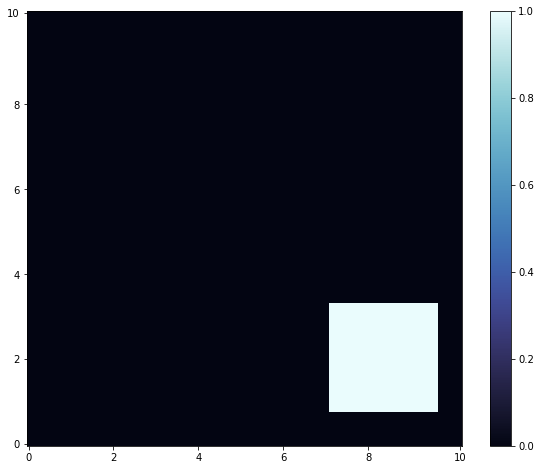

In [6]:
simulation.full_stage = np.array(test_set[get_simulation_index(45, simulation), :])
anim = simulation.generate_anime()
# save animation
# anim.save('../original_simulation.mp4')

In [37]:
# view animation
HTML(anim.to_jshtml())

In [7]:
size = 128
batch_size = 64
seed = 41
valid_batch_size = 1000

### Generate Hilbert SFC

In [8]:
space_filling_orderings, invert_space_filling_orderings = get_hilbert_curves(128, 1)

#### Visualize

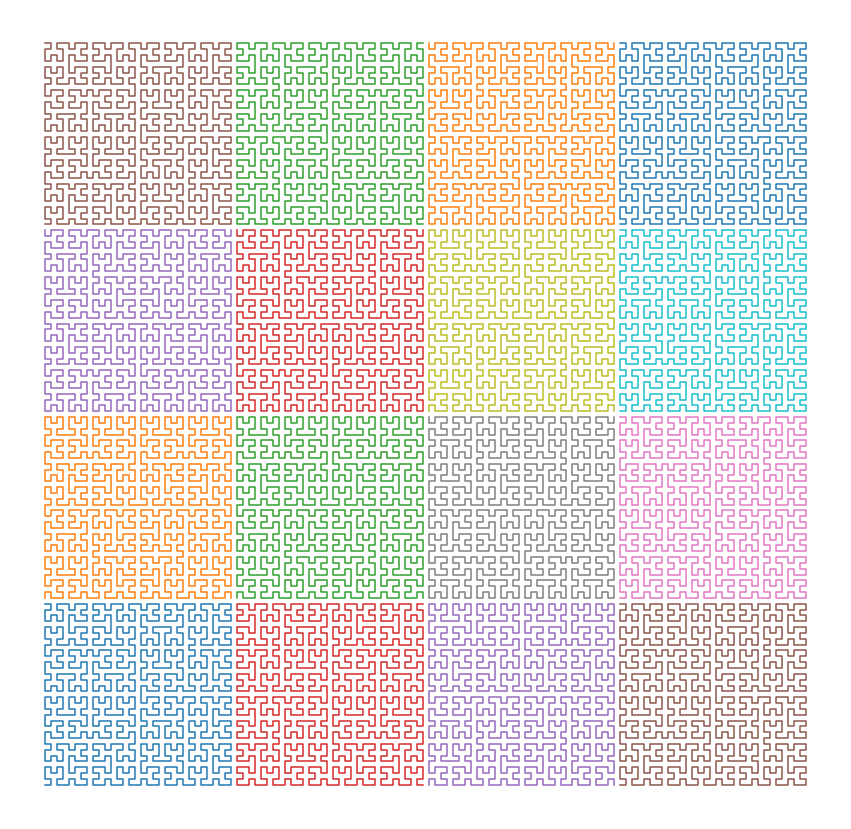

In [9]:
plot_trace_structured_2D(space_filling_orderings[0], 16)

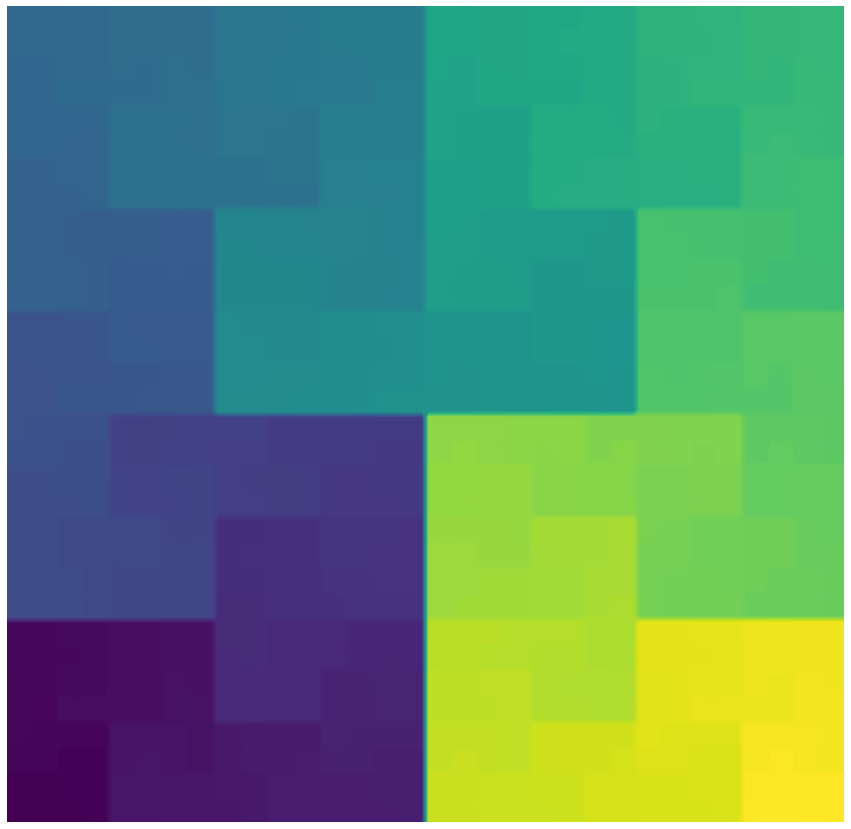

In [11]:
plot_contour_structured_2D(space_filling_orderings[0])

In [16]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

### The following cell is quite vital, as it indicates the parameters for the **autoencoder**

`input_size` is the number of Node, for example 128 * 128 = 16384 <br> `dimension` is the dimension of the data in Vtu file, 2 or 3.<br> `components` is the number of components you are compressing, if the tensor is 2 dimension, then it's default of 1. <br>
`self_concat` is chennel copying operation, you could keep it default as 1, or 2 when you have multiple SFCs. <br> `structured`: bool, whether you are training SFC-CAE on a structured mesh or not.<br>`nearest_neighboring`: bool, adding sparse layers or not, suggest to turn on.<br>
`dims_letent`: The dimension of the compressed data after applying decoder. <br>
`space_filling_orderings`, `invert_space_filling_orderings` : lists of sfc\inverse_sfc nums, generated by `get_sfc_curves_from_coords` function, or read the orderings from a `csv` file on your own. <br>
`activation`: Can be customly defined, but if you not spcify, the activation would be `ReLU()` for structured mesh, and `Tanh()` for unstructured mesh. <br>
`Variational` Whether this is a variational autoencoder or not. <br>
`force_initialising_param`: intialize the parameters of all convolutional/ fully-connected layers according to a uniform random distribution [a, b], default is `None`.

In [17]:
input_size = size ** 2
dimension = 2
components = 1
structured = True
self_concat = 2
nearest_neighbouring = True
dims_latent = 8
variational = False

In [27]:
autoencoder = SFC_CAE(input_size,
                                  dimension,
                                  components,
                                  structured,
                                  self_concat,
                                  nearest_neighbouring,
                                  dims_latent,
                                  space_filling_orderings, 
                                  invert_space_filling_orderings,
                                  variational = variational,
                                  force_initialising_param = None)

In [28]:
autoencoder.output_structure()

The LaTeX script for the table structure of the SFC-CAE has been written to 'LatexTable.txt', please copy it to a LaTeX compiler environment, e.g. overleaf.


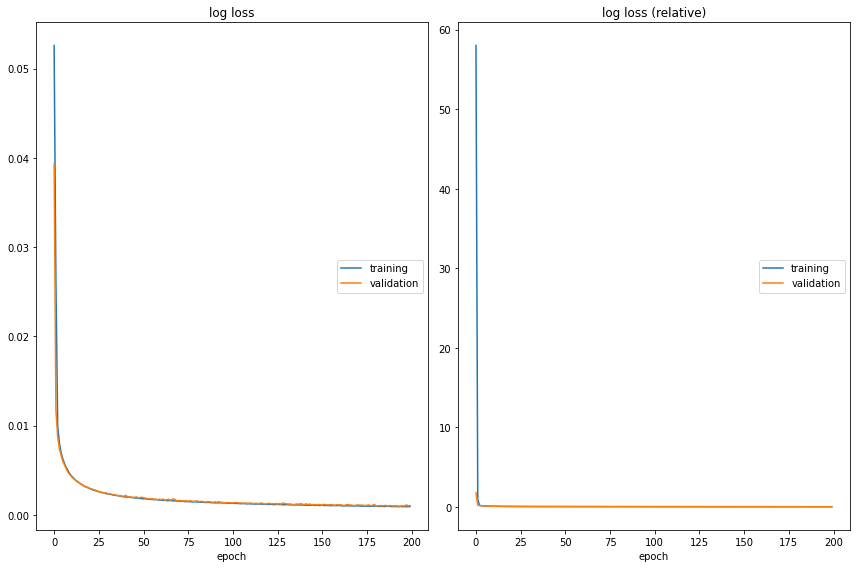

log loss
	training         	 (min:    0.001, max:    0.053, cur:    0.001)
	validation       	 (min:    0.001, max:    0.039, cur:    0.001)
log loss (relative)
	training         	 (min:    0.015, max:   58.017, cur:    0.015)
	validation       	 (min:    0.016, max:    1.757, cur:    0.016)
Epoch:  199 | train loss: 9.292298e-04 | valid loss: 1.031044e-03 
      	| train loss (relative): 1.511831e-02 | valid loss (relative): 1.638053e-02 
Epoch 199 use: 6.35 second.

test MSE Error: 1.110963e-03 | relative MSE Error: 1.767473e-02 
 Total time used for training: 0.35 hour.


In [29]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          test_loader = test_loader,
                          n_epochs =200, 
                          lr = 1e-4, 
                          seed = seed,
                          visualize = True)
                          # save_path = '/content/gdrive/MyDrive/Models/Block/')

In [30]:
test_out = autoencoder.to('cpu')(test_set)

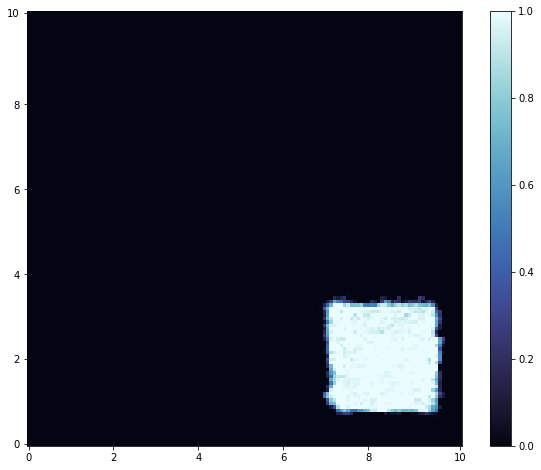

In [31]:
simulation.full_stage = test_out[get_simulation_index(45, simulation), :].detach().numpy()
anim = simulation.generate_anime()
# anim.save('../SFC_CAE__block_latent_16.mp4')

In [32]:
# view reconstucted animation
HTML(anim.to_jshtml())

### Let's try 2 MFT-RNN curves now.

In [38]:
space_filling_orderings, invert_space_filling_orderings = get_MFT_RNN_curves_structured(size, 2)

#### Visualize

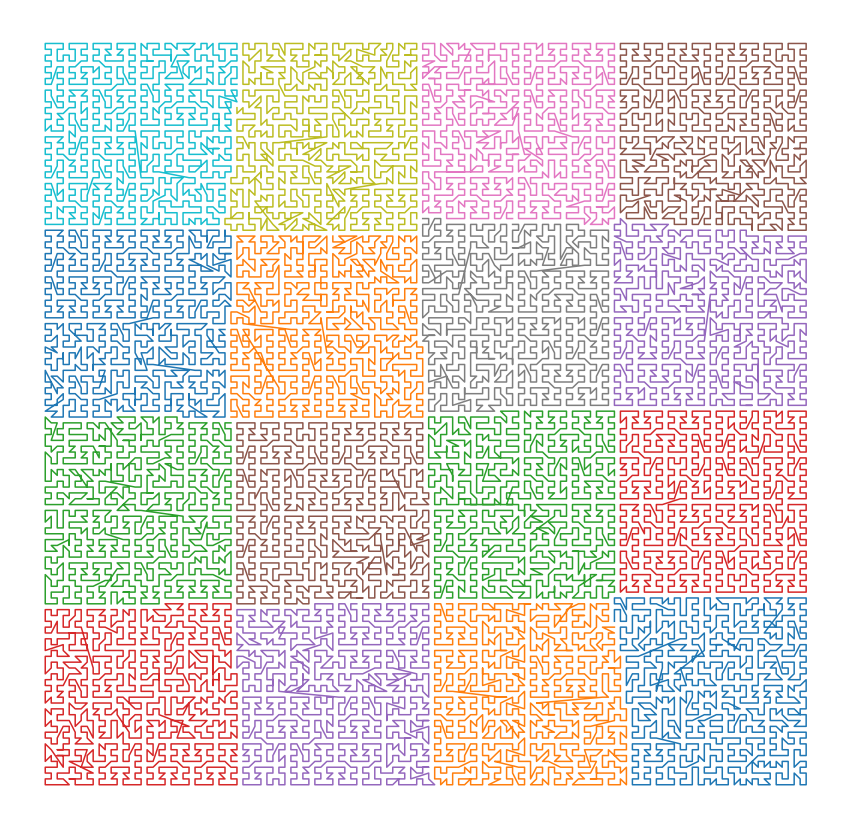

In [39]:
plot_trace_structured_2D(space_filling_orderings[0], 16)

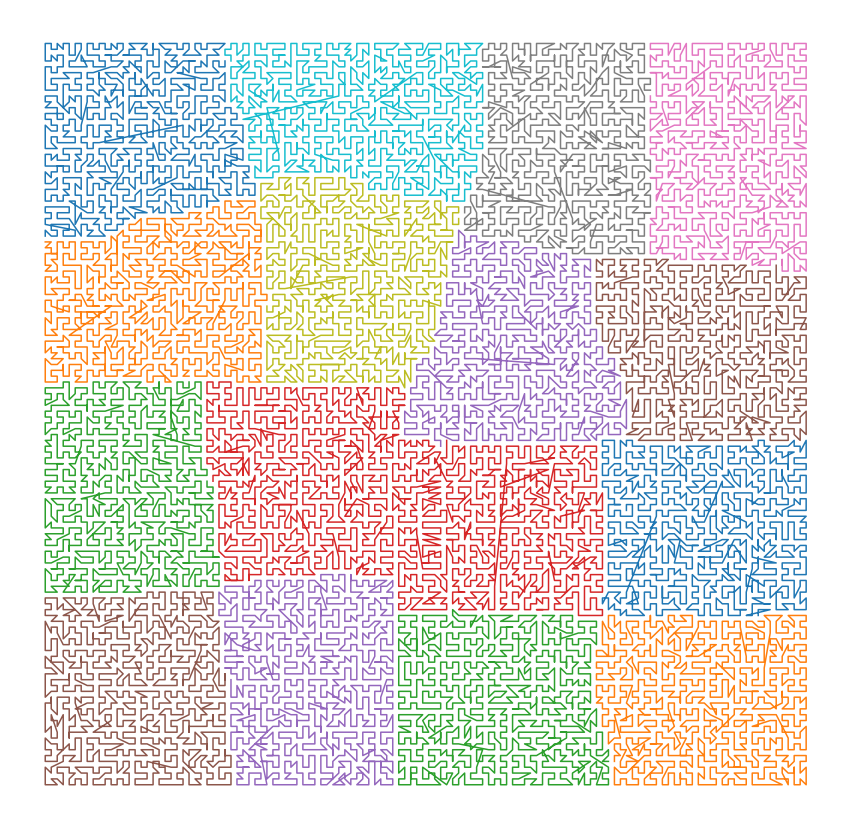

In [40]:
plot_trace_structured_2D(space_filling_orderings[1], 16)

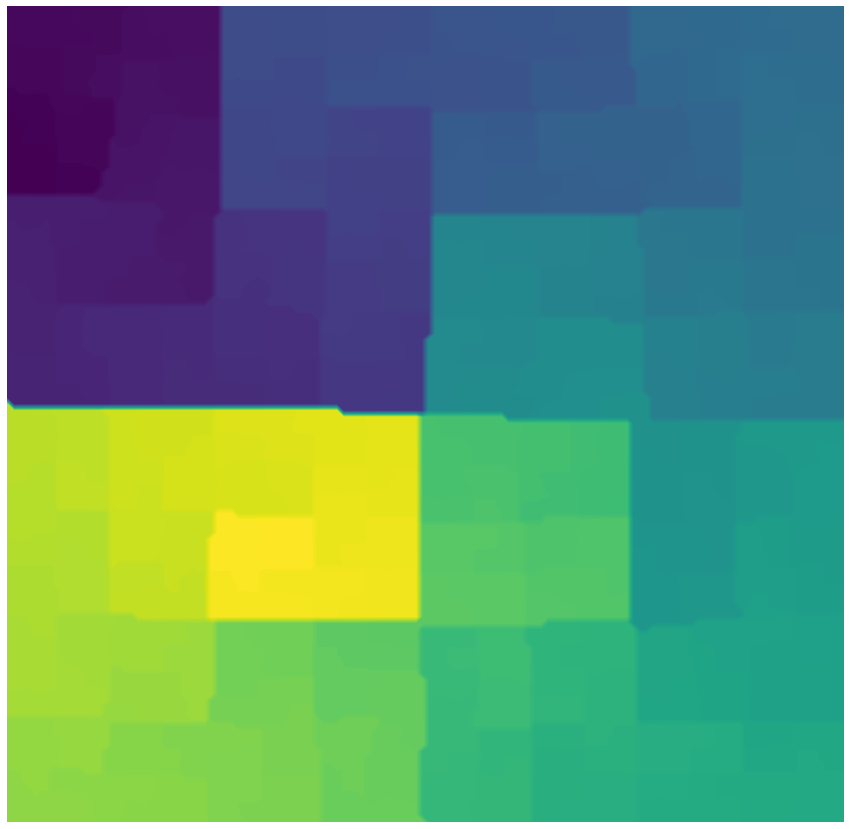

In [41]:
plot_contour_structured_2D(space_filling_orderings[0])

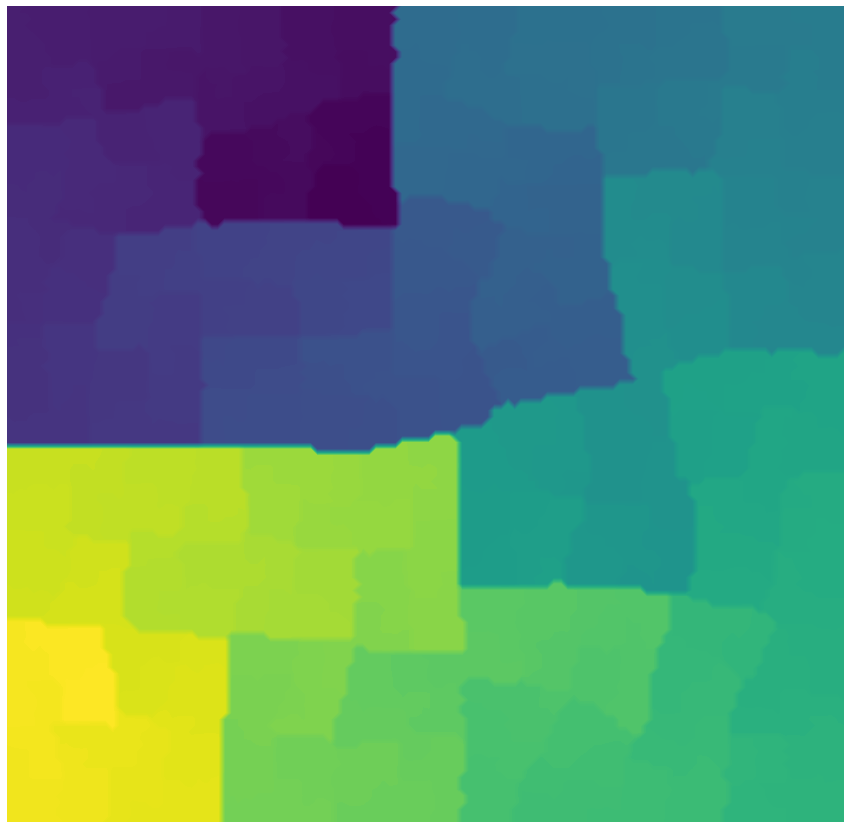

In [42]:
plot_contour_structured_2D(space_filling_orderings[1])

#### Re-initialize the Autoencoder

In [43]:
autoencoder = SFC_CAE(input_size,
                                  dimension,
                                  components,
                                  structured,
                                  self_concat,
                                  nearest_neighbouring,
                                  dims_latent,
                                  space_filling_orderings, 
                                  invert_space_filling_orderings,
                                  variational = variational,
                                  force_initialising_param = None)

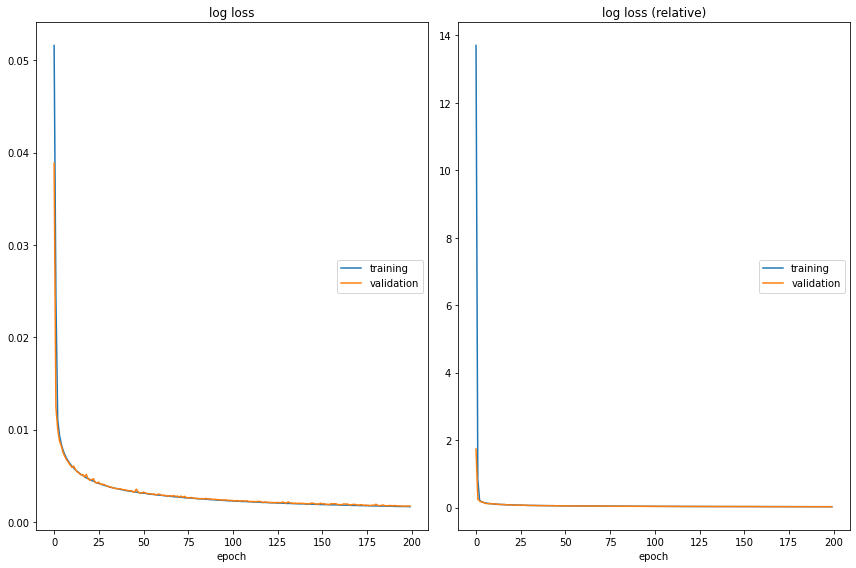

log loss
	training         	 (min:    0.002, max:    0.052, cur:    0.002)
	validation       	 (min:    0.002, max:    0.039, cur:    0.002)
log loss (relative)
	training         	 (min:    0.027, max:   13.699, cur:    0.027)
	validation       	 (min:    0.028, max:    1.736, cur:    0.028)
Epoch:  199 | train loss: 1.639619e-03 | valid loss: 1.716134e-03 
      	| train loss (relative): 2.700851e-02 | valid loss (relative): 2.823953e-02 
Epoch 199 use: 11.67 second.

test MSE Error: 1.876612e-03 | relative MSE Error: 3.091754e-02 
 Total time used for training: 0.65 hour.


In [44]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          test_loader = test_loader,
                          n_epochs =200, 
                          lr = 1e-4, 
                          seed = seed,
                          visualize = True)
                          # save_path = '/content/gdrive/MyDrive/Models/Block/')

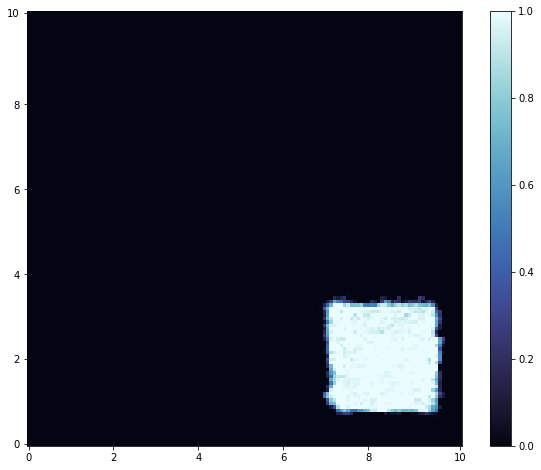

In [45]:
simulation.full_stage = test_out[get_simulation_index(45, simulation), :].detach().numpy()
anim = simulation.generate_anime()
# anim.save('../reconstrcuted_2_MFTRNN_NN_latent_8.mp4')

In [46]:
# view reconstucted animation
HTML(anim.to_jshtml())